In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from datetime import datetime
import dateutil
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,5)
gs = gridspec.GridSpec(2, 2)
pd.options.mode.chained_assignment = None

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


**Data Loading**

In [ ]:
with open("/content/drive/MyDrive/DataCleaning/Data/bank-additional/bank-additional-full.csv",'r', encoding="ISO-8859-1") as reader:
    # Making a list of missing value types
    missing_values = ["n/a", "na", "-"]
    dfb = pd.read_csv(reader,na_values = missing_values,sep=';')
dfb.iloc[:10]

age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   
5  telephone   may         mon  ...         1    999         0  nonexistent   
6  telephone   may         mon  ...         1    999         0  nonexistent   
7  telephone   may         mon  ...         1    999         0  nonexistent   
8  telephone   may         mon  ...         1    999         0  nonexistent   
9  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.857       5191.0  no  
1          1.1          93.994          -36.4      4.857       5191.0  no  
2          1.1          93.994          -36.4      4.857       5191.0  no  
3          1.1          93.994          -36.4      4.857       5191.0  no  
4          1.1          93.994          -36.4      4.857       5191.0  no  
5          1.1          93.994          -36.4      4.857       5191.0  no  
6          1.1          93.994          -36.4      4.857       5191.0  no  
7          1.1          93.994          -36.4      4.857       5191.0  no  
8          1.1          93.994          -36.4      4.857       5191.0  no  
9          1.1          93.994          -36.4      4.857       5191.0  no  

[10 rows x 21 columns]

**Understanding The Data**

In [ ]:
dfb.shape

(41188, 21)

In [ ]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Summary Statistics**

In [ ]:
dfb.describe(include='all')


age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              12168   32588   21576   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     NaN     NaN   
50%        38.00000     NaN      NaN                NaN     NaN     NaN   
75%        47.00000     NaN      NaN                NaN     NaN     NaN   
max        98.00000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week  ...      campaign         pdays  \
count   41188     41188  41188       41188  ...  41188.000000  41188.000000   
unique      3         2     10           5  ...           NaN           NaN   
top        no  cellular    may         thu  ...           NaN           NaN   
freq    33950     26144  13769        8623  ...           NaN           NaN   
mean      NaN       NaN    NaN         NaN  ...      2.567593    962.475454   
std       NaN       NaN    NaN         NaN  ...      2.770014    186.910907   
min       NaN       NaN    NaN         NaN  ...      1.000000      0.000000   
25%       NaN       NaN    NaN         NaN  ...      1.000000    999.000000   
50%       NaN       NaN    NaN         NaN  ...      2.000000    999.000000   
75%       NaN       NaN    NaN         NaN  ...      3.000000    999.000000   
max       NaN       NaN    NaN         NaN  ...     56.000000    999.000000   

            previous     poutcome  emp.var.rate  cons.price.idx  \
count   41188.000000        41188  41188.000000    41188.000000   
unique           NaN            3           NaN             NaN   
top              NaN  nonexistent           NaN             NaN   
freq             NaN        35563           NaN             NaN   
mean        0.172963          NaN      0.081886       93.575664   
std         0.494901          NaN      1.570960        0.578840   
min         0.000000          NaN     -3.400000       92.201000   
25%         0.000000          NaN     -1.800000       93.075000   
50%         0.000000          NaN      1.100000       93.749000   
75%         0.000000          NaN      1.400000       93.994000   
max         7.000000          NaN      1.400000       94.767000   

        cons.conf.idx     euribor3m   nr.employed      y  
count    41188.000000  41188.000000  41188.000000  41188  
unique            NaN           NaN           NaN      2  
top               NaN           NaN           NaN     no  
freq              NaN           NaN           NaN  36548  
mean       -40.502600      3.621291   5167.035911    NaN  
std          4.628198      1.734447     72.251528    NaN  
min        -50.800000      0.634000   4963.600000    NaN  
25%        -42.700000      1.344000   5099.100000    NaN  
50%        -41.800000      4.857000   5191.000000    NaN  
75%        -36.400000      4.961000   5228.100000    NaN  
max        -26.900000      5.045000   5228.100000    NaN  

[11 rows x 21 columns]

**Profiling Step 1: Checking for completeness of the data**

In [ ]:
dfb.isnull().sum()
list_df=[dfb]
[print(f"For the DataFrame, we have percentage of missing values as\n{round((np.mean(df.isnull()))*100)}\n\n") for df in list_df]

For the DataFrame, we have percentage of missing values as
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64




/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


[None]

**Profiling Step 2: Checking the uniqueness, i am trying to find if there are any duplicate rows and  dropping them, if any.**

In [ ]:
duplicates_per=(((dfb.duplicated()==True).count())/len(dfb))*100
print(duplicates_per)


100.0


In [ ]:
# # bank client data:
# 1 - age (numeric)
# 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
# 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
# 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
# 5 - default: has credit in default? (categorical: 'no','yes','unknown')
# 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
# 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# 8 - contact: contact communication type (categorical: 'cellular','telephone')
# 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
# 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
# 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a
# call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
# 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# 14 - previous: number of contacts performed before this campaign and for this client (numeric)
# 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
# 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
# 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
# 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
# 20 - nr.employed: number of employees - quarterly indicator (numeric)
# 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
age_unique_values_list=dfb.job.unique()
marital_unique_values_list=dfb.marital.unique()
education_unique_values_list=dfb.education.unique()
default_unique_values_list=dfb.default.unique()
housing_unique_values_list=dfb.housing.unique()
loan_unique_values_list=dfb.loan.unique()
contact_unique_values_list=dfb.contact.unique()
month_unique_values_list=dfb.month.unique()
day_of_week_unique_values_list=dfb.day_of_week.unique()

**Profiling Step 3: Checking the validity of the data**


> For this dataset, we can check the validity of the data by comparing the attribute information proivided in the dataset with describe command results.

* For column representing age, describe meethod output is max value is 98 and min is 17. From this we can say data  for age is valid, because it doesn't contain any negative numbers.
* For the columns job, describe() outputs 12 unique values which are 'housemaid', 'services', 'admin.', 'blue-collar', 'technician',       'retired', 'management', 'unemployed', 'self-employed', 'unknown',       'entrepreneur', 'student' data types and are valid.
* For other columns like marital status has 4 unique values, education has 8 unique values, columns default, housing and loan has 3 unique values , month has 10 unique values and days of the week has 5 unique values.

All the unique values shows that data is valid when compared with the attribute information.




**Data Cleaning**

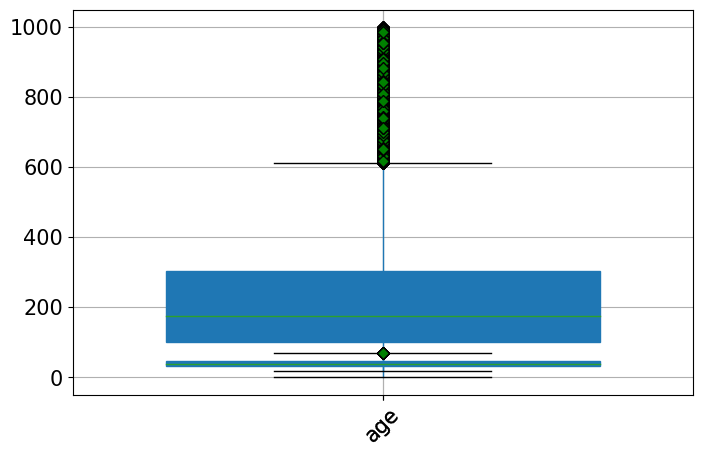

In [ ]:
# Step 1: Delete the rows which column 'poutcome' contains 'other'
condition = dfb.poutcome == 'other'
dfb = dfb.drop(dfb[condition].index, axis = 0, inplace = False)

# Step 2: Replace 'unknown' in job and education with 'other'
dfb[['job','education','marital','loan']] = dfb[['job','education','marital','loan']].replace(['unknown'],'other')

#Dropping outliers

green_diamond = dict(markerfacecolor='g', marker='D')
axes = dfb.boxplot(column=['duration'], rot=45, fontsize=15, widths = 0.7, patch_artist = True, grid=True, flierprops=green_diamond)

# dfb=dfb[dfb['duration']<1000]
# axes = dfb.boxplot(column=['duration'], rot=45, fontsize=15, widths = 0.7, patch_artist = True, grid=True, flierprops=green_diamond)

axes = dfb.boxplot(column=['age'], rot=45, fontsize=15, widths = 0.7, patch_artist = True, grid=True, flierprops=green_diamond)

# dfb= dfb[dfb['age']<=70]
# axes = dfb.boxplot(column=['age'], rot=45, fontsize=15, widths = 0.7, patch_artist = True, grid=True, flierprops=green_diamond)


**Preprocessing the data : Ordering the education column by using either of the two methods used below. So that, plot can have educations in a sorted order.**

In [ ]:
# Using pd.Categorical method to define and order education categories
# (When you specify the categories, pandas remembers the order of specification as the default sort order.)
educations = ['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown']
dfb['categorical_education'] = pd.Categorical(dfb['education'], categories=educations, ordered=True)
se= dfb.sort_values(by="categorical_education")

**Preprocessing the data : Ordering the day of the week column by method used below. So that, days of the week can presented in a plot in sorted order.**

In [ ]:
#  Using pd.Categorical method to define and order day categories
days = ["mon", "tue", "wed", "thu", "fri","sat","sun"]
dfb['categorical_day'] = pd.Categorical(dfb['day_of_week'], categories=days, ordered=True)
sda= dfb.sort_values(by="categorical_day")

**Preprocessing the data : Ordering the month column by using either of the two methods used below. So that, plot can have months in a sorted order.**

In [ ]:
# 1. Using pd.Categorical method to define and order month categories
# (When you specify the categories, pandas remembers the order of specification as the default sort order.)
months = ["jan", "feb", "mar", "apr", "may", "jun",
          "jul", "aug", "sep", "oct", "nov", "dec"]
dfb['categorical_month'] = pd.Categorical(dfb['month'], categories=months, ordered=True)
sm= dfb.sort_values(by="categorical_month")

**Preprocessing the data : Categorising the age column**

In [ ]:
# Using pd.cut method to categorize age column using bins
# There are no people of age 0-10 , so used 10 as min age to make groups.
# Checked it using this (children = pd.DataFrame() children=sa[sa['age_groups'] =='[0, 10)'])

bins= np.arange(10,110,10,dtype=int)
dfb['age_groups']= pd.cut(dfb['age'], bins, ordered=True, right=False)
sa= dfb.sort_values(by="age")

**Preprocessing the data : Categorising the duration column**

In [ ]:
# Using pd.Categorical method to categorize duration column
bins= np.arange(0,1000,100,dtype=int)
dfb['duration_groups'] = pd.cut(dfb['duration'], bins, ordered=True, right=False)
sd= dfb.sort_values(by="duration")
sd=sd[sd['duration']>0]
sd_no= sd[sd['y'] == 'no']
sd_yes=sd[sd['y'] == 'yes']

**Exploration Step1:1.	If there is any relation between age of clients and subscriptions?**

Text(0.5, 1.0, 'Distribution of age and subscription')

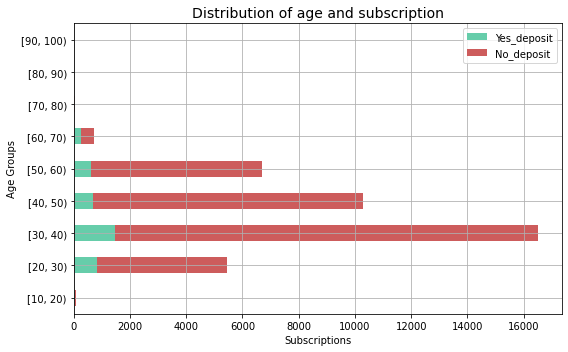

In [ ]:
# Creating two dataframe based on the subscription outcomes
sa_no= sa[sa['y'] == 'no']
sa_yes=sa[sa['y'] == 'yes']

# Counting the number of subscriptions for different age groups and outcomes
Temp= pd.DataFrame()
Temp['Yes_deposit'] =sa_yes.groupby(['age_groups'])['y'].count()
Temp['No_deposit'] = sa_no.groupby(['age_groups'])['y'].count()

# Plotting the variables age groups , count of different outcomes
Temp.plot(kind='barh',stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"},grid=True)
plt.xlabel('Subscriptions', fontsize=10)
plt.ylabel('Age Groups', fontsize=10)
plt.title('Distribution of age and subscription', loc='Center', fontsize=14)

**Observation:** Looks like most people that were contacted and also most of people deposited belongs to age group : (30 - 40)

Text(0.5, 1.0, 'Distribution of age and subscriptions for 10 people contacted in each age group')

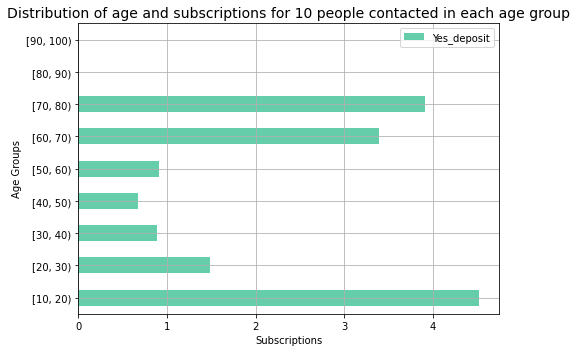

In [ ]:
# Finding out the success of subscription rates per 10 people (total['count'].min() is 10) contacted
sa_no= sa[sa['y'] == 'no']
sa_yes=sa[sa['y'] == 'yes']
age= pd.DataFrame()
age['Yes_deposit'] =sa_yes.groupby(['age_groups'])['y'].count()

# Calculating total count of people contacted in each age group
total= pd.DataFrame()
total['count']=((sa_yes.groupby(['age_groups'])['y'].count())+(sa_no.groupby(['age_groups'])['y'].count()))

#Normalizing the dataframes each age group's total count to 10
age['Yes_deposit'] =((sa_yes.groupby(['age_groups'])['y'].count())/(total['count']))*10

# Plotting the normalized count vs age groups
age.plot.barh(color='MediumAquamarine', grid=True)
plt.xlabel('Subscriptions', fontsize=10)
plt.ylabel('Age Groups', fontsize=10)
plt.title('Distribution of age and subscriptions for 10 people contacted in each age group', loc='Center', fontsize=14)


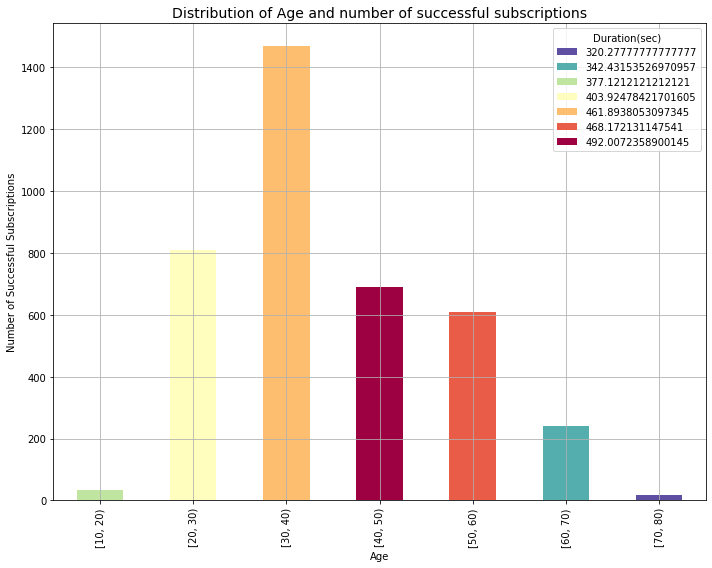

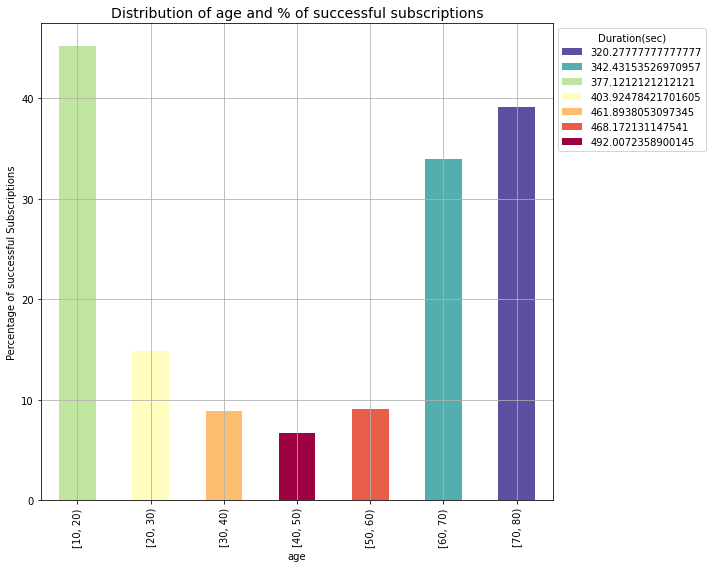

In [ ]:
#Finding out average duration of calls that were successful for each age group
Temp4= pd.DataFrame()
sa_yes=sa[sa['y'] == 'yes']
Temp4['Yes_deposit'] = sa_yes.groupby(['age_groups'])['y'].count()

sa_no = sa[sa['y'] == 'no']
Temp4['No_deposit'] = sa_no.groupby(['age_groups'])['y'].count()


Temp4['yes_duration']= sa_yes.groupby(['age_groups'])['duration'].mean()
Temp4['yes_duration']= Temp4['yes_duration'].replace(np.nan,0)
# Temp4['yes_duration']=Temp4['yes_duration'].astype('int64')

Temp4['No_duration']= sa_no.groupby(['age_groups'])['duration'].mean()
Temp4['No_duration']= Temp4['No_duration'].replace(np.nan,0)
# Temp4['No_duration'] = Temp4.astype({'No_duration': 'int64'})

Temp4=Temp4[Temp4['yes_duration']!=0]

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
Temp4.pivot_table(index='age_groups', columns='yes_duration', values='Yes_deposit',aggfunc='sum', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Duration(sec)",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('Age', fontsize=10)
plt.ylabel('Number of Successful Subscriptions', fontsize=10)
plt.title('Distribution of Age and number of successful subscriptions', loc='Center', fontsize=14)
plt.show()


Temp4['total']=Temp4['No_deposit'] + Temp4['Yes_deposit']
Temp4['Yes_deposit_percent']=(Temp4['Yes_deposit']/Temp4['total'])*100
Temp4['Yes_deposit_percent']= Temp4['Yes_deposit_percent'].replace(np.nan,0)

duration= pd.DataFrame()
duration = Temp4
duration=duration[duration['yes_duration']!=0]


plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
duration.pivot_table(index='age_groups', columns='yes_duration', values='Yes_deposit_percent', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Duration(sec)",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('age', fontsize=10)
plt.ylabel('Percentage of successful Subscriptions', fontsize=10)
plt.title('Distribution of age and % of successful subscriptions', loc='Center', fontsize=14)
plt.show()





**Observation:** These results are unexpected, as we can see that for every 10 people contacted in each group, higher subscription rates can be observed in the age group : (70-80) followed by (10-20) and then (60-70) .

**Exploration Step 2:	Does education play major role in subscribing for a term deposit?**

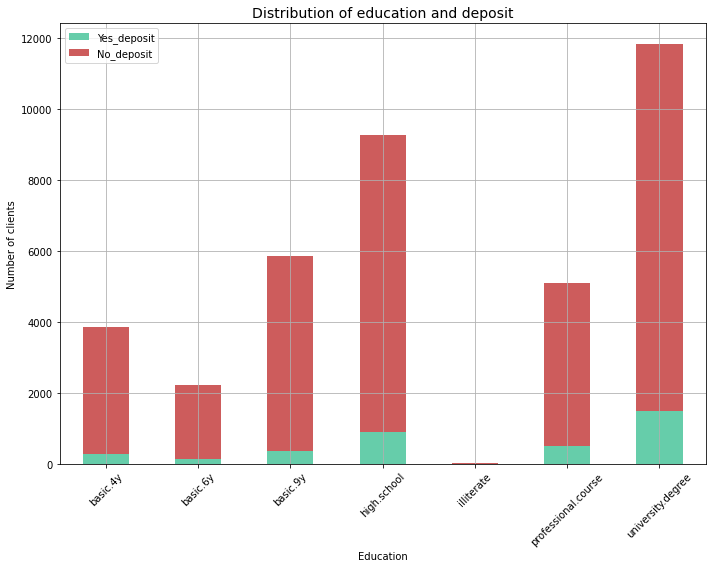

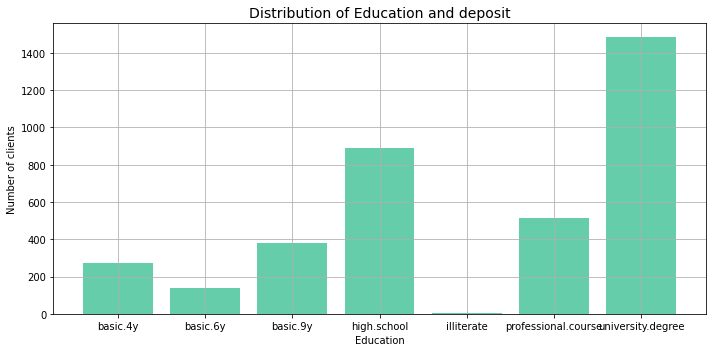

In [ ]:
# count categorical values
Temp1= pd.DataFrame()
se_yes=se[se['y'] == 'yes']
Temp1['Yes_deposit'] = se_yes.groupby(['categorical_education'])['y'].count()
se_no = se[se['y'] == 'no']
Temp1['No_deposit'] = se_no.groupby(['categorical_education'])['y'].count()

# Removing the category of unknown to get better observations
Temp1=Temp1.drop(labels=['unknown'])

Temp1.plot(kind='bar',rot=45,stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"},grid= True)
plt.xlabel('Education', fontsize=10)
plt.ylabel('Number of clients', fontsize=10)
plt.title('Distribution of education and deposit', loc='Center', fontsize=14)
plt.show()

plt.figure(figsize=(10,5))
plt.bar(Temp1.index,'Yes_deposit', data=Temp1, color='MediumAquamarine', linewidth=1)
plt.grid()
plt.xlabel('Education', fontsize=10)
plt.ylabel('Number of clients', fontsize=10)
plt.title('Distribution of Education and deposit', loc='Center', fontsize=14)
plt.show()


**Observation :**  We can see that most of the people that were contacted and have higher successful subscriptions are the people who pursued university degree.

Text(0.5, 1.0, 'Distribution of Education and subscriptions for 10 people contacted in each age group')

<Figure size 576x360 with 0 Axes>

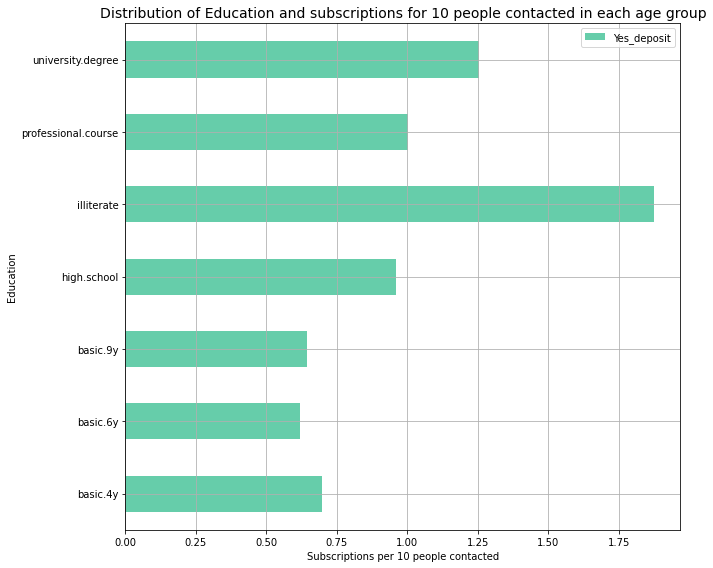

In [ ]:
# Normalizing the count of people contacted to 1
se_no= se[se['y'] == 'no']
se_yes=se[se['y'] == 'yes']

# Calculating total count of people contacted in each age group
total= pd.DataFrame()
total['count']=((se_yes.groupby(['categorical_education'])['y'].count())+(se_no.groupby(['categorical_education'])['y'].count()))

education= pd.DataFrame()
education['Yes_deposit'] =se_yes.groupby(['categorical_education'])['y'].count()
education['Yes_deposit'] =((se_yes.groupby(['categorical_education'])['y'].count())/(total['count']))*10

# Removing the category of unknown to get better observations
education=education.drop(labels=['unknown'])

# Plotting the normalized count vs education categories
plt.figure(figsize=(8,5))
education.plot.barh(color='MediumAquamarine', grid=True)
plt.xlabel('Subscriptions per 10 people contacted', fontsize=10)
plt.ylabel('Education', fontsize=10)
plt.title('Distribution of Education and subscriptions for 10 people contacted in each age group', loc='Center', fontsize=14)


**Observation:** Looks like illiterate people are more attracted towards this bank marketing strategies. Followed by people who pursued university degree. May be they are the people who are in the stage of earning a bit higher amount of salary than other category people and wants to save some money for future investments.

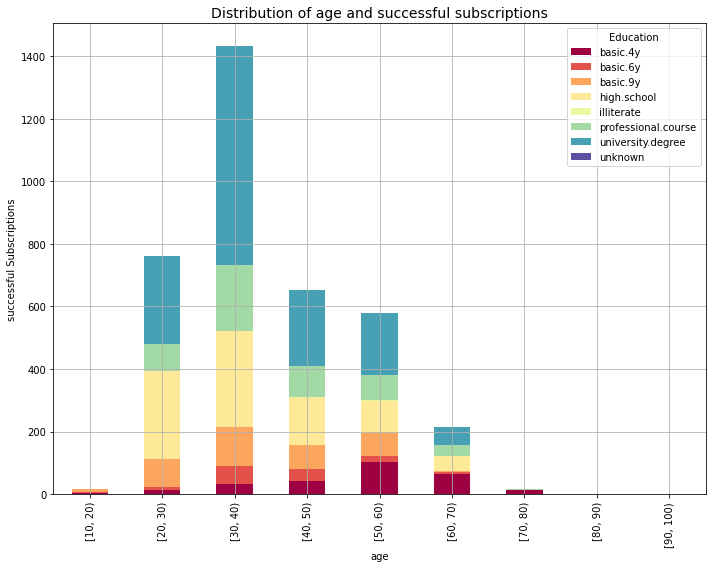

In [ ]:
# What could be the age groups of people belonging to different educational categories and who have higher subscription rates?
age_education= pd.DataFrame()

age_education['Subscription_rates']= sa_yes.groupby(['age_groups','categorical_education'])['y'].count()
age_education['Subscription_rates']= age_education['Subscription_rates'].replace(np.nan,0)

total= pd.DataFrame()
total['total']=Temp.groupby(['age_groups'])['No_deposit'].sum() + Temp.groupby(['age_groups'])['Yes_deposit'].sum()

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
age_education.pivot_table(index='age_groups', columns='categorical_education', values='Subscription_rates', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral").legend(title="Education",bbox_to_anchor=(1.0, 1.0))
# yes_education.plot.bar(stacked=True,colormap='Paired')
plt.xlabel('age', fontsize=10)
plt.ylabel('successful Subscriptions', fontsize=10)
plt.title('Distribution of age and successful subscriptions', loc='Center', fontsize=14)
plt.show()

**Observation:** Well, people who have university degree and in the age group of (30-40) have higher rate of subscription for the term deposit.

**Exploration step 3: Does the duration of phone calls effect the subscriptions ?**

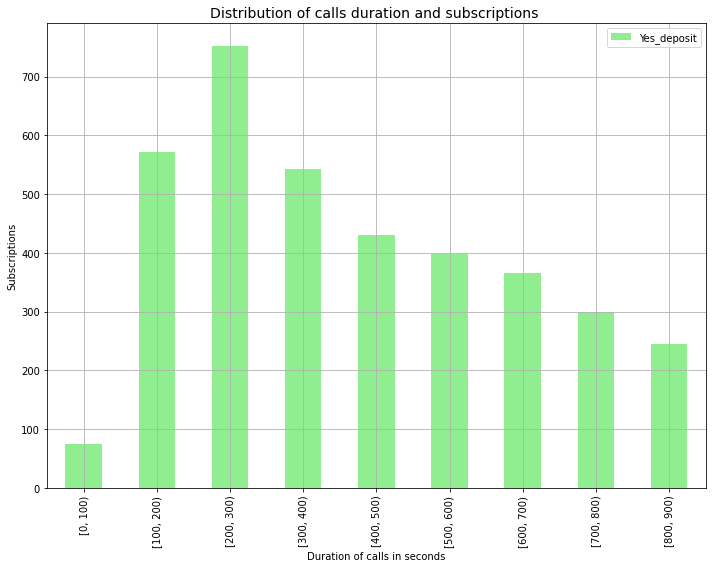

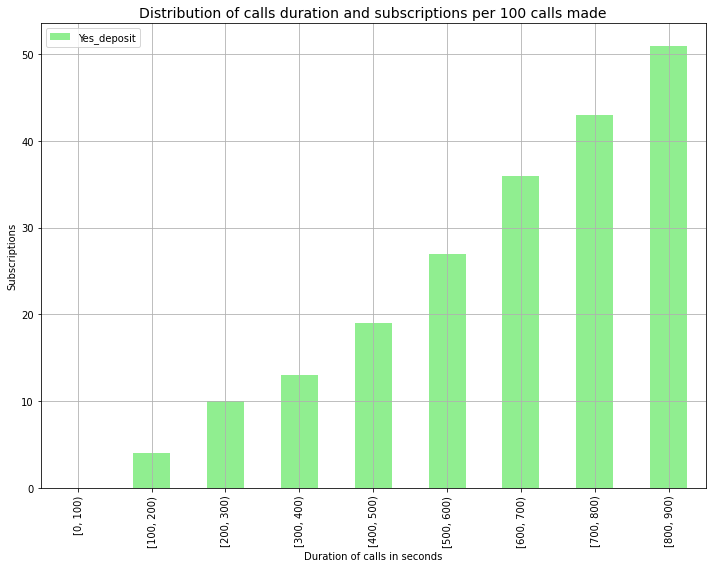

In [ ]:
Temp2= pd.DataFrame()
Temp2['Yes_deposit'] = sd_yes.groupby(['duration_groups'])['y'].count()

Temp2.plot(kind='bar',color="lightgreen", grid= True)
plt.xlabel('Duration of calls in seconds', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of calls duration and subscriptions ', loc='Center', fontsize=14)
plt.show()

Temp2['No_deposit'] = sd_no.groupby(['duration_groups'])['y'].count()

percent= pd.DataFrame()
percent['No_deposit'] = sd_no.groupby(['duration_groups'])['y'].count()
percent['Yes_deposit'] = sd_yes.groupby(['duration_groups'])['y'].count()



Temp2['total']=Temp2['Yes_deposit'] + Temp2['No_deposit']
Temp2=Temp2[Temp2['total']>100]


Temp2['No_deposit_p']=(Temp2['No_deposit']/(Temp2['No_deposit'] + Temp2['Yes_deposit']))*100
Temp2['No_deposit_p']= Temp2['No_deposit_p'].replace(np.nan,0)

Temp2['Yes_deposit_p']=(Temp2['Yes_deposit']/(Temp2['No_deposit'] + Temp2['Yes_deposit']))*100
Temp2['Yes_deposit_p']= Temp2['Yes_deposit_p'].replace(np.nan,0)

percent['No_deposit'] = Temp2['No_deposit_p']
percent['Yes_deposit'] = Temp2['Yes_deposit_p']
percent=percent.dropna()

percent['No_deposit']= percent['No_deposit'].astype('int64')
percent['Yes_deposit']= percent['Yes_deposit'].astype('int64')

percent.index
percent.drop('No_deposit', axis=1, inplace=True)

percent.plot(kind='bar',color="lightgreen", grid= True)
plt.xlabel('Duration of calls in seconds', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of calls duration and subscriptions per 100 calls made', loc='Center', fontsize=14)
plt.show()

**Observation:** Most of the duration groups above 1400sec are discarded, as we have set up the threshold level to have atleast 100 calls are recorded in each duration group. The results shows that calls of duration above 800 seconds have 50% of successful subscriptions. Normalization can help in identifying different patterns.

**Exploration Step 4:	Employees of which job categories are more into subscription policies**

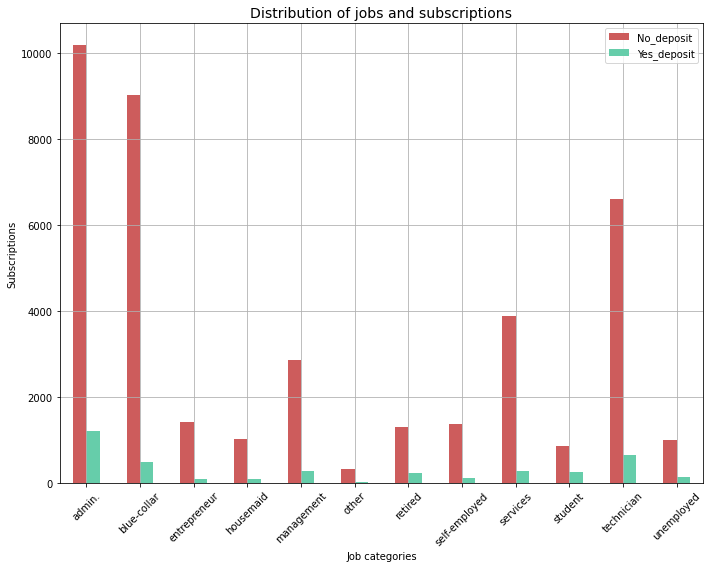

In [ ]:
Temp3= pd.DataFrame()
dfb_no = dfb[dfb['y'] == 'no']
Temp3['No_deposit'] = dfb.groupby(['job'])['job'].count()
dfb_yes=dfb[dfb['y'] == 'yes']
Temp3['Yes_deposit'] = dfb_yes.groupby(['job'])['job'].count()

Temp3.plot.bar(color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"},rot=45, grid= True)
plt.xlabel('Job categories', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of jobs and subscriptions', loc='Center', fontsize=14)
plt.show()

**Observation:** People working as adminstrator, technichian followed by blue-collar have highest subscription rates.

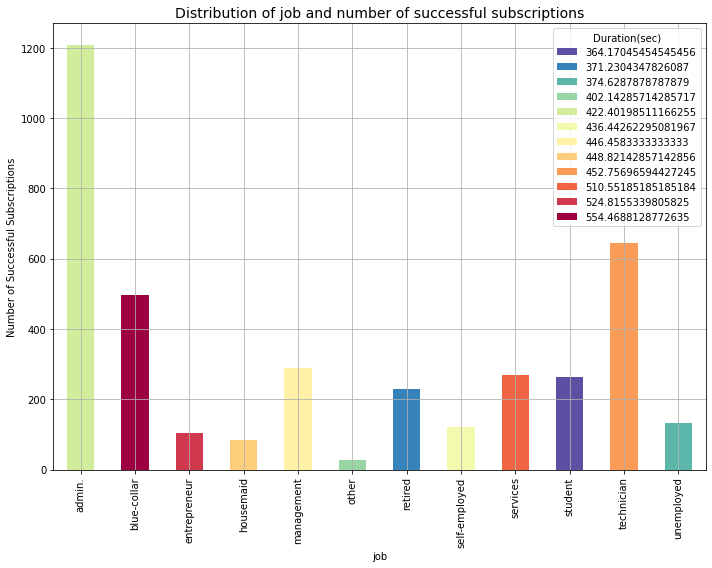

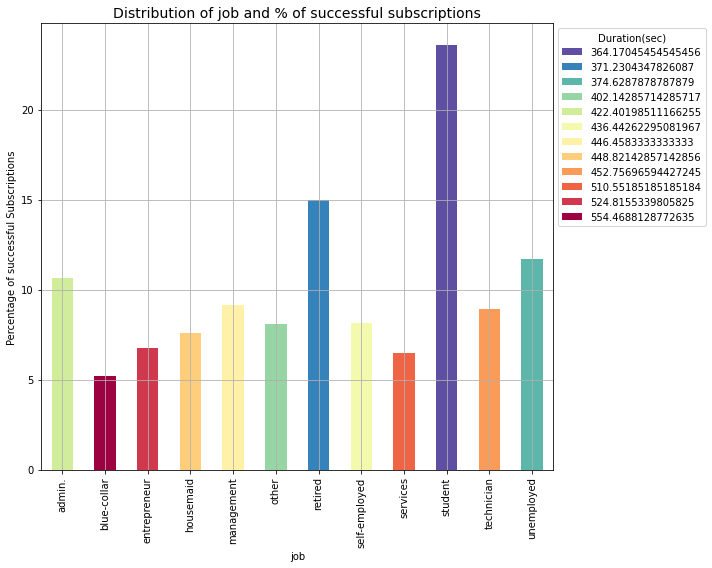

In [ ]:
#Finding out average duration of calls that were successful for each age group
Temp3= pd.DataFrame()
dfb_no = dfb[dfb['y'] == 'no']
Temp3['No_deposit'] = dfb.groupby(['job'])['job'].count()
dfb_yes=dfb[dfb['y'] == 'yes']
Temp3['Yes_deposit'] = dfb_yes.groupby(['job'])['job'].count()


Temp3['yes_duration']= dfb_yes.groupby(['job'])['duration'].mean()
Temp3['yes_duration']= Temp3['yes_duration'].replace(np.nan,0)
# Temp4['yes_duration']=Temp4['yes_duration'].astype('int64')

Temp3['No_duration']= dfb_no.groupby(['job'])['duration'].mean()
Temp3['No_duration']= Temp3['No_duration'].replace(np.nan,0)
# Temp4['No_duration'] = Temp4.astype({'No_duration': 'int64'})

Temp3=Temp3[Temp3['yes_duration']!=0]

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
Temp3.pivot_table(index='job', columns='yes_duration', values='Yes_deposit',aggfunc='sum', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Duration(sec)",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('job', fontsize=10)
plt.ylabel('Number of Successful Subscriptions', fontsize=10)
plt.title('Distribution of job and number of successful subscriptions', loc='Center', fontsize=14)
plt.show()


Temp3['total']=Temp3['No_deposit'] + Temp3['Yes_deposit']
Temp3['Yes_deposit_percent']=(Temp3['Yes_deposit']/Temp3['total'])*100
Temp3['Yes_deposit_percent']= Temp3['Yes_deposit_percent'].replace(np.nan,0)

duration= pd.DataFrame()
duration = Temp3
duration=duration[duration['yes_duration']!=0]


plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
duration.pivot_table(index='job', columns='yes_duration', values='Yes_deposit_percent', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Duration(sec)",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('job', fontsize=10)
plt.ylabel('Percentage of successful Subscriptions', fontsize=10)
plt.title('Distribution of job and % of successful subscriptions', loc='Center', fontsize=14)
plt.show()





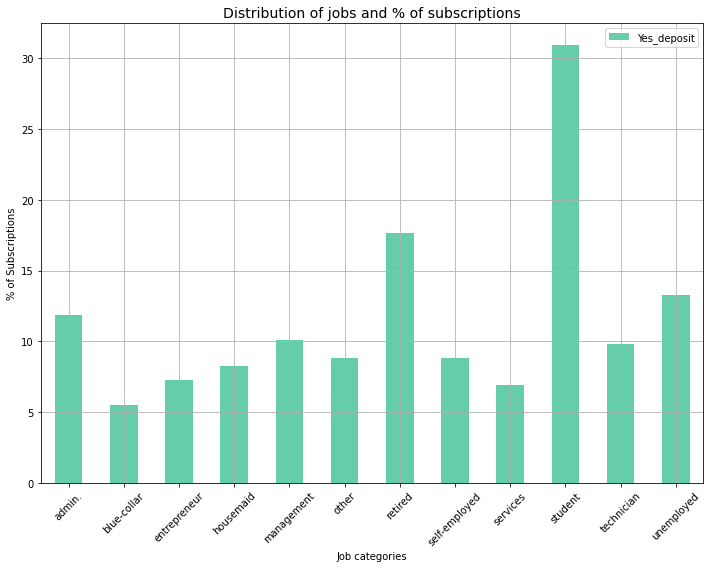

In [ ]:
Temp3= pd.DataFrame()
dfb_no = dfb[dfb['y'] == 'no']
Temp3['No_deposit'] = dfb.groupby(['job'])['y'].count()
dfb_yes=dfb[dfb['y'] == 'yes']
Temp3['Yes_deposit'] = dfb_yes.groupby(['job'])['y'].count()

# Calculating total count of people contacted in each age group
total= pd.DataFrame()
total['count']=((dfb_yes.groupby(['job'])['y'].count())+(dfb_no.groupby(['job'])['y'].count()))

Temp3= pd.DataFrame()
Temp3['Yes_deposit'] =dfb_yes.groupby(['job'])['y'].count()
Temp3['Yes_deposit'] =((dfb_yes.groupby(['job'])['y'].count())/(total['count']))*100


Temp3.plot.bar(color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"},rot=45, grid= True)
plt.xlabel('Job categories', fontsize=10)
plt.ylabel('% of Subscriptions', fontsize=10)
plt.title('Distribution of jobs and % of subscriptions', loc='Center', fontsize=14)
plt.show()

**Observation:** This bar chart shows that students are have higher percent of subscriptions for term deposit followed by retired people compared to people of other job categories. May be retired people get their PFA, which may be why they have subscribed for term deposits.

**Exploration Step 5:	On which day or month are subscription rates higher**

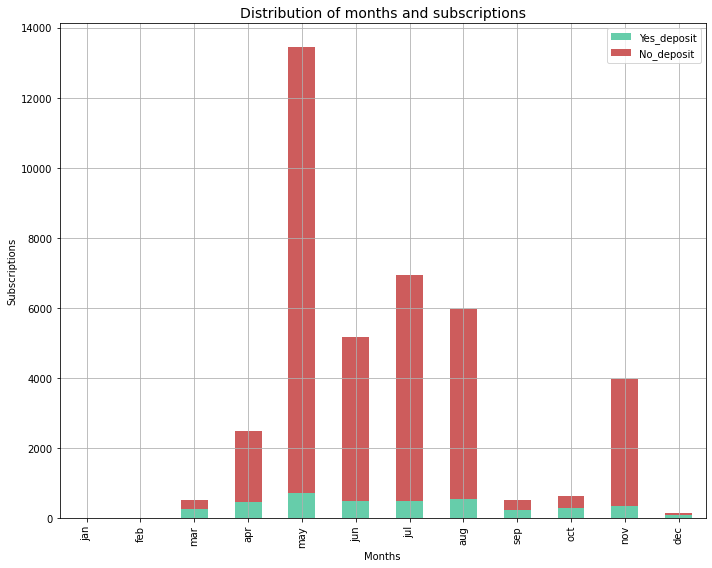

Text(0.5, 1.0, 'Distribution of Months and subscriptions')

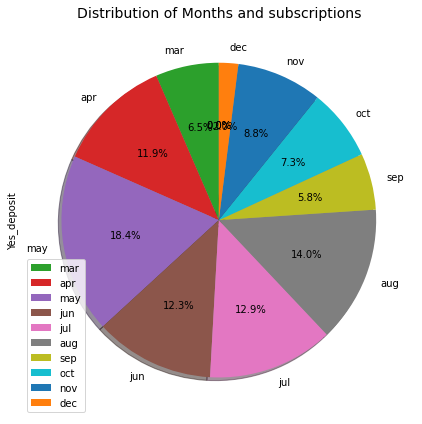

In [ ]:
Temp4= pd.DataFrame()
sm_yes=sm[sm['y'] == 'yes']
Temp4['Yes_deposit'] = sm_yes.groupby(['categorical_month'])['month'].count()
sm_no = sm[sm['y'] == 'no']
Temp4['No_deposit'] = sm_no.groupby(['categorical_month'])['month'].count()

Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"},grid=True)
plt.xlabel('Months', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of months and subscriptions', loc='Center', fontsize=14)
plt.show()

Temp4= Temp4.drop(columns='No_deposit')

Temp4.plot.pie(subplots=True, figsize=(6, 6),autopct='%1.1f%%',shadow = True, startangle=90)
plt.title('Distribution of Months and subscriptions', loc='Center', fontsize=14)

**Observation:** From the plot, we can observe 17.8% of total successful subscriptions took in may followed by july and august.

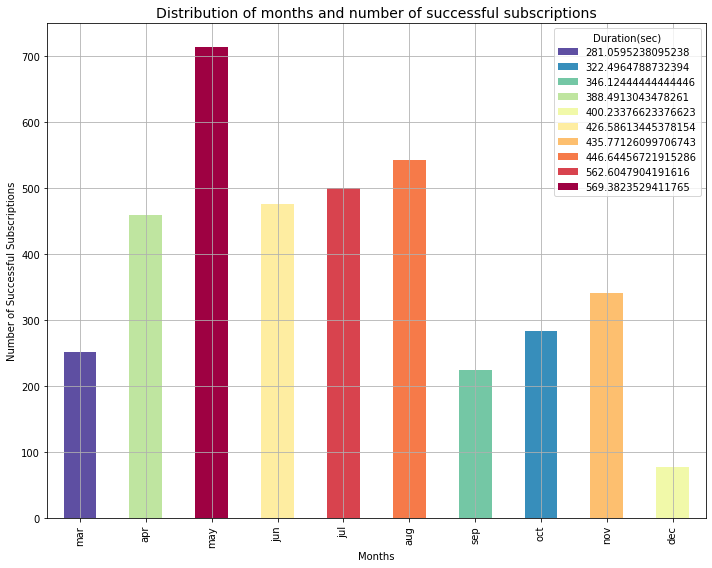

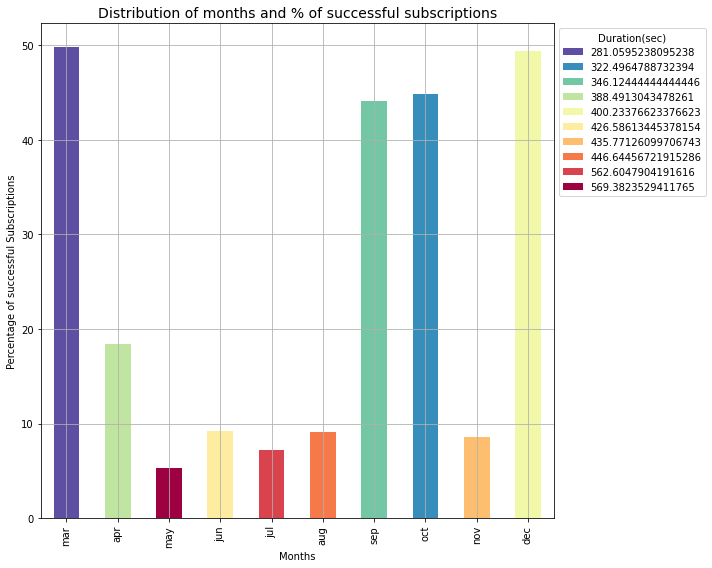

In [ ]:
#Finding out average duration of calls that were successful each month
Temp4= pd.DataFrame()
sm_yes=sm[sm['y'] == 'yes']
Temp4['Yes_deposit'] = sm_yes.groupby(['categorical_month'])['y'].count()

sm_no = sm[sm['y'] == 'no']
Temp4['No_deposit'] = sm_no.groupby(['categorical_month'])['y'].count()


Temp4['yes_duration']= sm_yes.groupby(['categorical_month'])['duration'].mean()
Temp4['yes_duration']= Temp4['yes_duration'].replace(np.nan,0)
# Temp4['yes_duration']=Temp4['yes_duration'].astype('int64')

Temp4['No_duration']= sm_no.groupby(['categorical_month'])['duration'].mean()
Temp4['No_duration']= Temp4['No_duration'].replace(np.nan,0)
# Temp4['No_duration'] = Temp4.astype({'No_duration': 'int64'})

Temp4=Temp4[Temp4['yes_duration']!=0]

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
Temp4.pivot_table(index='categorical_month', columns='yes_duration', values='Yes_deposit',aggfunc='sum', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Duration(sec)",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('Months', fontsize=10)
plt.ylabel('Number of Successful Subscriptions', fontsize=10)
plt.title('Distribution of months and number of successful subscriptions', loc='Center', fontsize=14)
plt.show()


Temp4['total']=Temp4['No_deposit'] + Temp4['Yes_deposit']
Temp4['Yes_deposit_percent']=(Temp4['Yes_deposit']/Temp4['total'])*100
Temp4['Yes_deposit_percent']= Temp4['Yes_deposit_percent'].replace(np.nan,0)

duration= pd.DataFrame()
duration = Temp4
duration=duration[duration['yes_duration']!=0]


plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
duration.pivot_table(index='categorical_month', columns='yes_duration', values='Yes_deposit_percent', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Duration(sec)",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('Months', fontsize=10)
plt.ylabel('Percentage of successful Subscriptions', fontsize=10)
plt.title('Distribution of months and % of successful subscriptions', loc='Center', fontsize=14)
plt.show()





**Observation:** From the first plot we can see that months with higher subscriptions are may, july and august have average duration of 704sec,709 and 549 sec. But the second plot shows higher percentage of successful subscriptions are observed in march, december and september have average duration of calls in the range of 309 to 423 seconds. Prior to this plot, we have seen that students and retired people have subcribed more to term deposits. So ,march and december could be the leisure or holiday seasons where people might be willing to attend the calls when compared to other seasons with work.

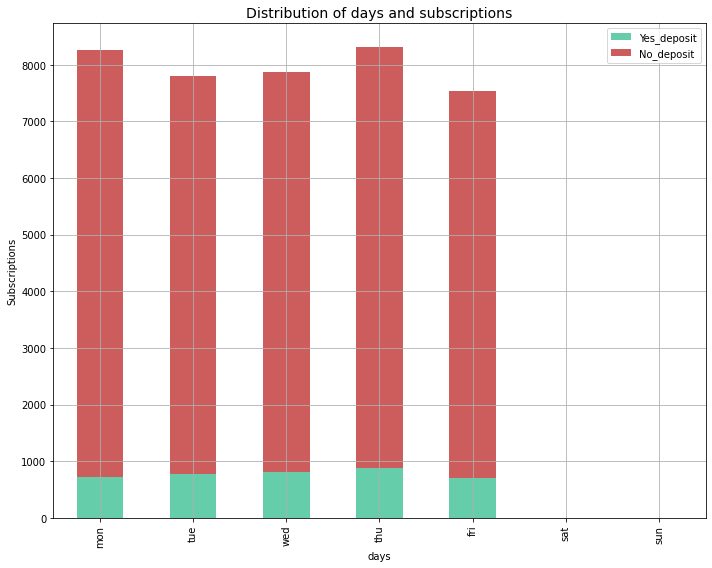

Text(0.5, 1.0, 'Distribution of days of the week and subscriptions')

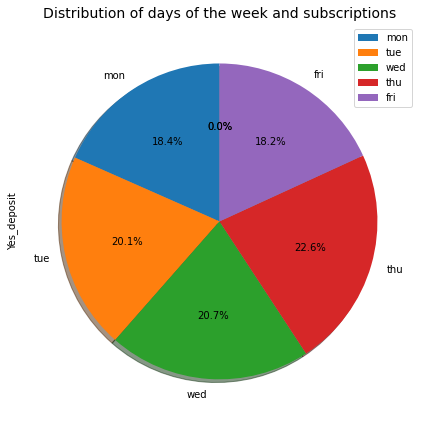

In [ ]:
Temp5= pd.DataFrame()
sda_yes=sda[sda['y'] == 'yes']
Temp5['Yes_deposit'] = sda_yes.groupby(['categorical_day'])['day_of_week'].count()
sda_no = sda[sda['y'] == 'no']
Temp5['No_deposit'] = sda_no.groupby(['categorical_day'])['day_of_week'].count()

Temp5.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"}, grid=True)
plt.xlabel('days', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of days and subscriptions', loc='Center', fontsize=14)
plt.show()

Temp5= Temp5.drop(columns='No_deposit')

Temp5.plot.pie(subplots=True, figsize=(6, 6),autopct='%1.1f%%',shadow = True,startangle=90)
plt.title('Distribution of days of the week and subscriptions', loc='Center', fontsize=14)

**Observation:** Results shows that more subscriptions took place on thursdays followed by wednesday and tuesday.

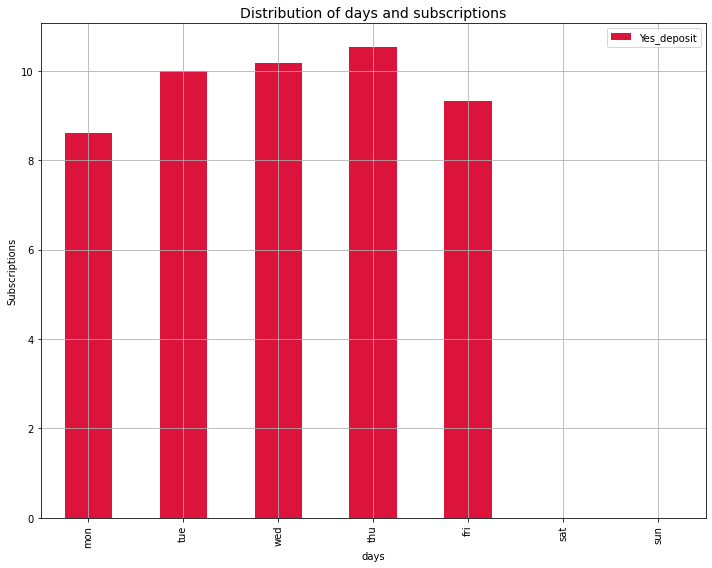

In [ ]:
# Let us find the percentage of successful subscriptions based on the total calls made on different days of the week
Temp5= pd.DataFrame()
sda_yes=sda[sda['y'] == 'yes']
Temp5['Yes_deposit'] = sda_yes.groupby(['categorical_day'])['y'].count()
sda_no = sda[sda['y'] == 'no']
Temp5['No_deposit'] = sda_no.groupby(['categorical_day'])['y'].count()

# Calculating total count of people contacted in each age group
total= pd.DataFrame()
total['count']=((dfb_yes.groupby(['categorical_day'])['y'].count())+(dfb_no.groupby(['categorical_day'])['y'].count()))

Temp5= pd.DataFrame()
Temp5['Yes_deposit'] =dfb_yes.groupby(['categorical_day'])['y'].count()
Temp5['Yes_deposit'] =((dfb_yes.groupby(['categorical_day'])['y'].count())/(total['count']))*100

Temp5.plot.bar(stacked=True,color="crimson", grid=True)
plt.xlabel('days', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of days and subscriptions', loc='Center', fontsize=14)
plt.show()


**Observation:** We can see that of the total calls made on thursday, nearly 11% were succeeded. This could not be justified with other parameters provided in the dataset.

**Exploration Step 6:	Does contacts to client helps in achieving higher subscription rates?**

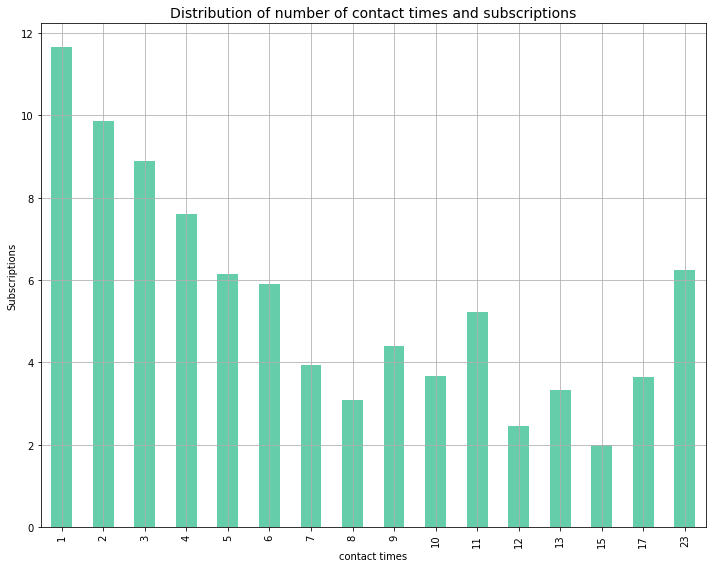

In [ ]:
Temp6= pd.DataFrame()
dfb_yes=dfb[dfb['y'] == 'yes']
Temp6['Yes_deposit'] = dfb_yes.groupby(['campaign'])['y'].count()
dfb_no = dfb[dfb['y'] == 'no']
Temp6['No_deposit'] = dfb_no.groupby(['campaign'])['y'].count()

# calculate the percent relative to the index
total = ((Temp6['Yes_deposit']) /(Temp6['Yes_deposit'] + Temp6['No_deposit']))*100

p1 = total.plot(kind='bar',stacked=True,color="MediumAquamarine",linewidth=1)
plt.grid(zorder=3)
plt.xlabel('contact times', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of number of contact times and subscriptions', loc='Center', fontsize=14)

plt.show()

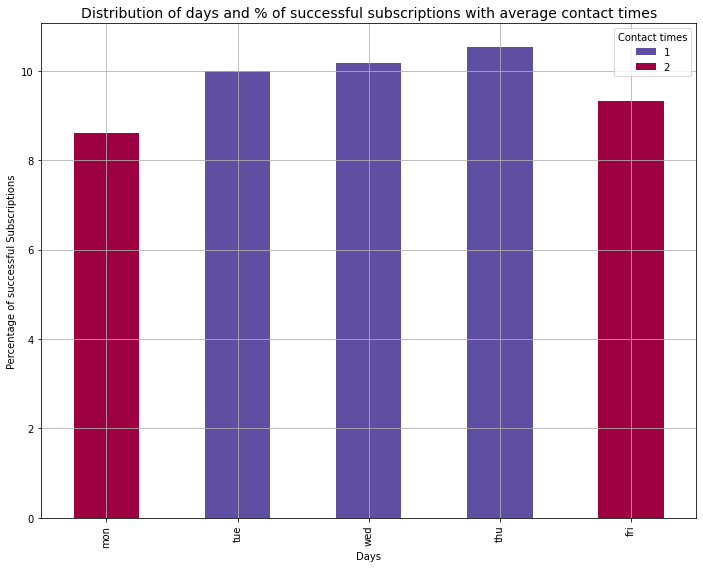

In [ ]:
#Finding out average duration of calls that were successful each day of the week
Temp6= pd.DataFrame()
dfb_yes=dfb[dfb['y'] == 'yes']
Temp6['Yes_deposit'] = dfb_yes.groupby(['categorical_day'])['y'].count()

dfb_no = dfb[dfb['y'] == 'no']
Temp6['No_deposit'] = dfb_no.groupby(['categorical_day'])['y'].count()


Temp6['yes_campaign']= dfb_yes.groupby(['categorical_day'])['campaign'].mean()
Temp6['yes_campaign']= Temp6['yes_campaign'].replace(np.nan,0)
Temp6['yes_campaign']=Temp6['yes_campaign'].astype('int64')

Temp6['No_campaign']= dfb_no.groupby(['categorical_day'])['campaign'].mean()
Temp6['No_campaign']= Temp6['No_campaign'].replace(np.nan,0)
Temp6['No_campaign'] = Temp6.astype({'No_campaign': 'int64'})

Temp6=Temp6[Temp6['yes_campaign']!=0]

Temp6['total']=Temp6['No_deposit'] + Temp6['Yes_deposit']
Temp6['Yes_deposit_percent']=(Temp6['Yes_deposit']/Temp6['total'])*100
Temp6['Yes_deposit_percent']= Temp6['Yes_deposit_percent'].replace(np.nan,0)

duration= pd.DataFrame()
duration = Temp6
duration=duration[duration['yes_campaign']!=0]


plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
duration.pivot_table(index='categorical_day', columns='yes_campaign', values='Yes_deposit_percent', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Contact times",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('Days', fontsize=10)
plt.ylabel('Percentage of successful Subscriptions', fontsize=10)
plt.title('Distribution of days and % of successful subscriptions with average contact times', loc='Center', fontsize=14)
plt.show()





**Observation:** During the days, having higher successful subscriptions, the average contact is 1 which is less than other days have average contact time of 2.

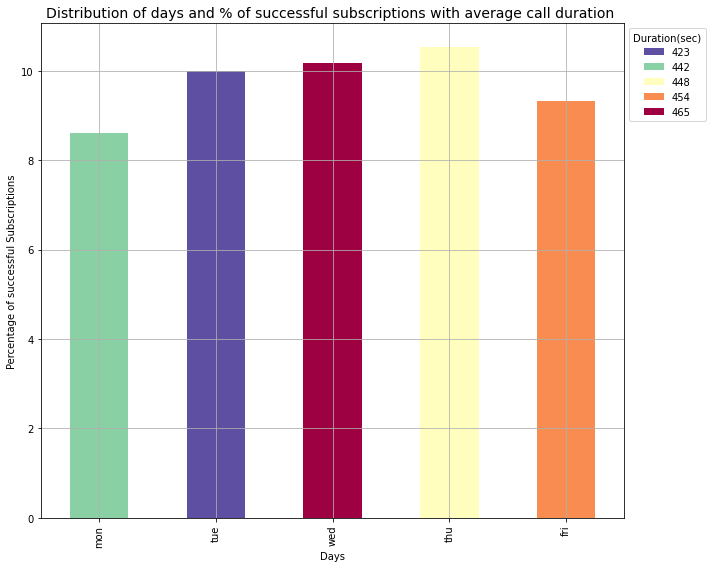

In [ ]:
#Finding out average duration of calls that were successful each day of the week
Temp6= pd.DataFrame()
dfb_yes=dfb[dfb['y'] == 'yes']
Temp6['Yes_deposit'] = dfb_yes.groupby(['categorical_day'])['y'].count()

dfb_no = dfb[dfb['y'] == 'no']
Temp6['No_deposit'] = dfb_no.groupby(['categorical_day'])['y'].count()


Temp6['yes_duration']= dfb_yes.groupby(['categorical_day'])['duration'].mean()
Temp6['yes_duration']= Temp6['yes_duration'].replace(np.nan,0)
Temp6['yes_duration']=Temp6['yes_duration'].astype('int64')

Temp6['No_duration']= dfb_no.groupby(['categorical_day'])['duration'].mean()
Temp6['No_duration']= Temp6['No_duration'].replace(np.nan,0)
Temp6['No_duration'] = Temp6.astype({'No_duration': 'int64'})

Temp6=Temp6[Temp6['yes_duration']!=0]

Temp6['total']=Temp6['No_deposit'] + Temp6['Yes_deposit']
Temp6['Yes_deposit_percent']=(Temp6['Yes_deposit']/Temp6['total'])*100
Temp6['Yes_deposit_percent']= Temp6['Yes_deposit_percent'].replace(np.nan,0)

duration= pd.DataFrame()
duration = Temp6
duration=duration[duration['yes_duration']!=0]


plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
duration.pivot_table(index='categorical_day', columns='yes_duration', values='Yes_deposit_percent', fill_value=0).plot.bar(stacked=True,grid=True,colormap="Spectral_r").legend(title="Duration(sec)",bbox_to_anchor=(1.0, 1.0))
# Temp4.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.xlabel('Days', fontsize=10)
plt.ylabel('Percentage of successful Subscriptions', fontsize=10)
plt.title('Distribution of days and % of successful subscriptions with average call duration ', loc='Center', fontsize=14)
plt.show()





**Observation:** Average duration of a call during different days of the week are nearly similar, which is 443 seconds on thursday having highest subscription rates compared to other days of the week.

**Exploration Step 7:	Do efforts of the previous campaign for a client have any effect on the current campaign? i.e., if the number of days after frequent contact effect the current campaign outcome**

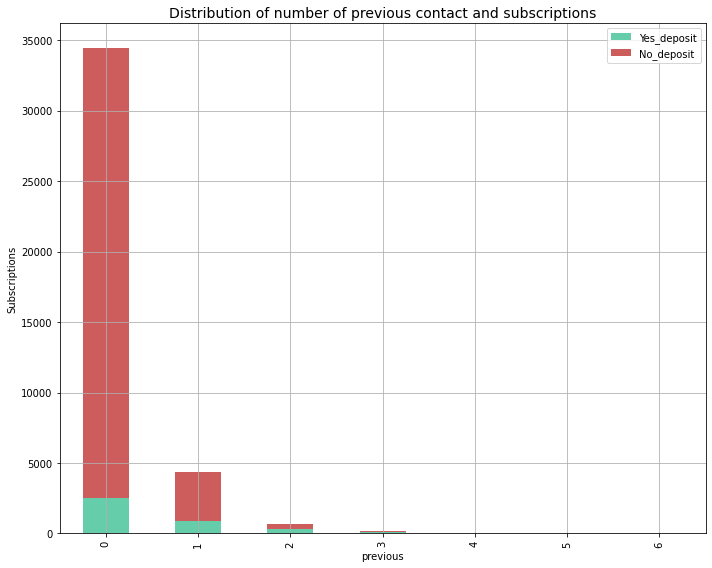

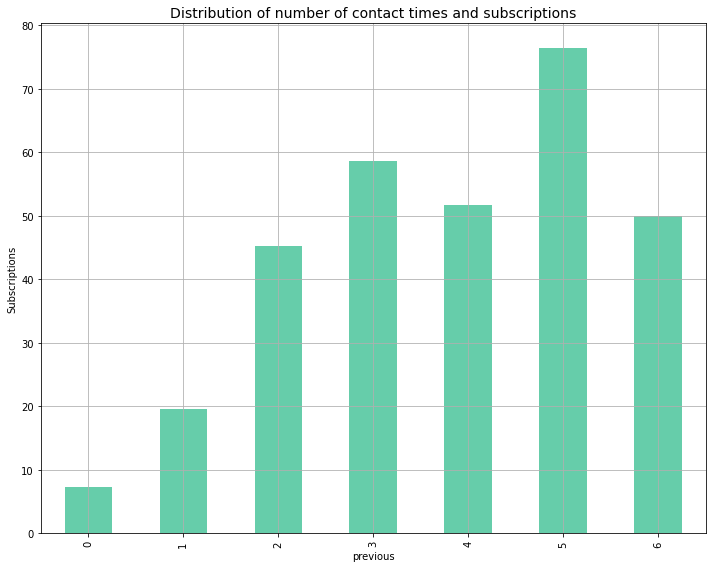

In [ ]:
Temp7= pd.DataFrame()
sp=dfb[dfb['pdays']>0]
dfb_yes=sp[sp['y'] == 'yes']
Temp7['Yes_deposit'] = dfb_yes.groupby(['previous'])['y'].count()
dfb_no = sp[sp['y'] == 'no']
Temp7['No_deposit'] = dfb_no.groupby(['previous'])['y'].count()


Temp7.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.grid(zorder=3)
plt.xlabel('previous', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of number of previous contact and subscriptions', loc='Center', fontsize=14)
plt.show()

# calculate the percent relative to the index
total = ((Temp7['Yes_deposit']) /(Temp7['Yes_deposit'] + Temp7['No_deposit']))*100

p1 = total.plot(kind='bar',stacked=True,color="MediumAquamarine",linewidth=1)
plt.grid(zorder=3)
plt.xlabel('previous', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of number of contact times and subscriptions', loc='Center', fontsize=14)

plt.show()

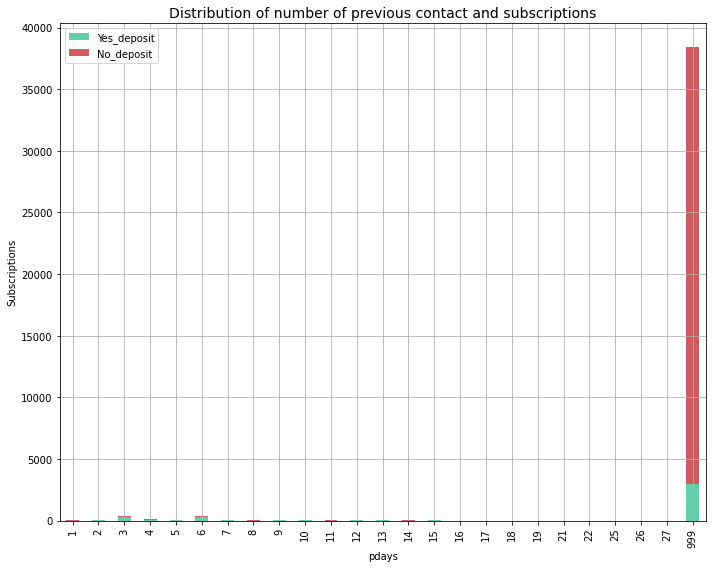

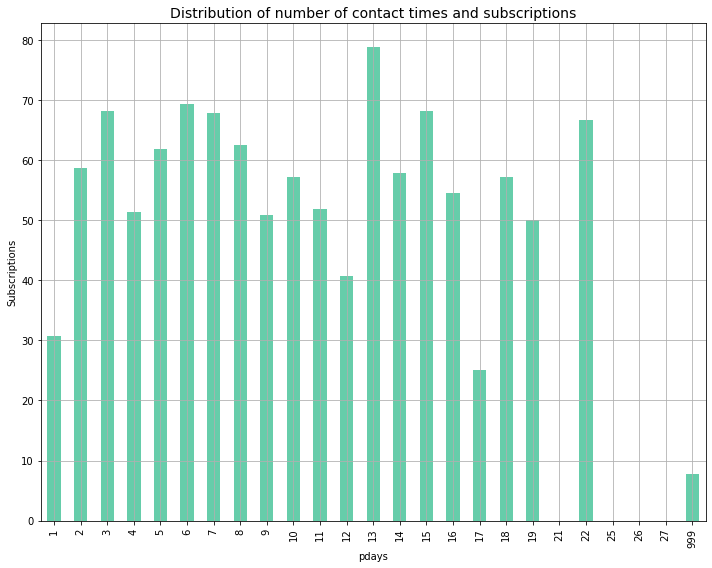

In [ ]:
Temp7= pd.DataFrame()
sp=dfb[dfb['pdays']>0]
dfb_yes=sp[sp['y'] == 'yes']
Temp7['Yes_deposit'] = dfb_yes.groupby(['pdays'])['y'].count()
dfb_no = sp[sp['y'] == 'no']
Temp7['No_deposit'] = dfb_no.groupby(['pdays'])['y'].count()

Temp7.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.grid(zorder=3)
plt.xlabel('pdays', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of number of previous contact and subscriptions', loc='Center', fontsize=14)
plt.show()

# calculate the percent relative to the index
total = ((Temp7['Yes_deposit']) /(Temp7['Yes_deposit'] + Temp7['No_deposit']))*100

p1 = total.plot(kind='bar',stacked=True,color="MediumAquamarine",linewidth=1)
plt.grid(zorder=3)
plt.xlabel('pdays', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of number of contact times and subscriptions', loc='Center', fontsize=14)

plt.show()

**Observation:** To get higher subscription rates, the gap between last contact in the previous campaign and first contact in the present campaign should be no less than 22 days.

In [ ]:
#Performing Chi-square test of y with different other variables
# Otained from this resource https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['age'])
# importing the required function
from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
#if two variables are correlated, then the P-value will come very close to zero.
print('The P-Value of the ChiSq Test for age and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['job'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for job and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['marital'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for marital and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['education'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for education and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['default'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for default and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['housing'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for housing and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['loan'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for loan and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['contact'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for contact and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['month'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for month and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['day_of_week'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for day_of_week and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['duration'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for duration and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['campaign'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for campaign and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['pdays'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for pdays and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['previous'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for previous and y is:', ChiSqResult[1])

CrosstabResult=pd.crosstab(index=dfb['y'],columns=dfb['poutcome'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test for poutcome and y is:', ChiSqResult[1])

The P-Value of the ChiSq Test for age and y is: 1.3837141491152574e-212
The P-Value of the ChiSq Test for job and y is: 1.9706474784135933e-170
The P-Value of the ChiSq Test for marital and y is: 2.089618152851095e-37
The P-Value of the ChiSq Test for education and y is: 2.1358431143813295e-51
The P-Value of the ChiSq Test for default and y is: 1.253460925998997e-96
The P-Value of the ChiSq Test for housing and y is: 0.03014222272486938
The P-Value of the ChiSq Test for loan and y is: 0.3298900534767799
The P-Value of the ChiSq Test for contact and y is: 6.006794335332338e-188
The P-Value of the ChiSq Test for month and y is: 0.0
The P-Value of the ChiSq Test for day_of_week and y is: 0.0002236454011669844
The P-Value of the ChiSq Test for duration and y is: 0.0
The P-Value of the ChiSq Test for campaign and y is: 2.2904696966799673e-31
The P-Value of the ChiSq Test for pdays and y is: 0.0
The P-Value of the ChiSq Test for previous and y is: 0.0
The P-Value of the ChiSq Test for poutco

Above results shows that month,duration,pdays,previous and poutcome are higly correlated with the output variable Y.

**Distribution of marital status and number of subscriptions**

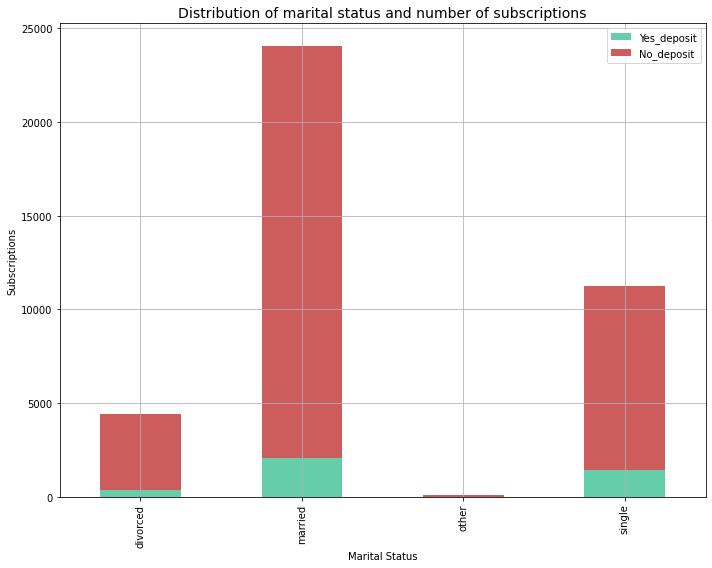

In [ ]:
Temp7= pd.DataFrame()
sp=dfb[dfb['pdays']>0]
dfb_yes=sp[sp['y'] == 'yes']
Temp7['Yes_deposit'] = dfb_yes.groupby(['marital'])['y'].count()
dfb_no = sp[sp['y'] == 'no']
Temp7['No_deposit'] = dfb_no.groupby(['marital'])['y'].count()


Temp7.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.grid(zorder=3)
plt.xlabel('Marital Status', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of marital status and number of subscriptions', loc='Center', fontsize=14)
plt.show()

**Distribution of communication type  and number of subscriptions**

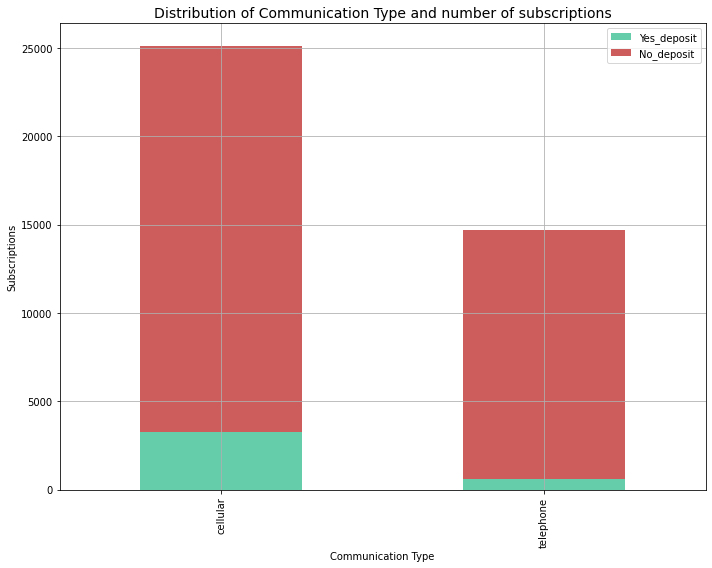

In [ ]:
Temp7= pd.DataFrame()
sp=dfb[dfb['pdays']>0]
dfb_yes=sp[sp['y'] == 'yes']
Temp7['Yes_deposit'] = dfb_yes.groupby(['contact'])['y'].count()
dfb_no = sp[sp['y'] == 'no']
Temp7['No_deposit'] = dfb_no.groupby(['contact'])['y'].count()


Temp7.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.grid(zorder=3)
plt.xlabel('Communication Type', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of Communication Type and number of subscriptions', loc='Center', fontsize=14)
plt.show()

**Distribution of loan and number of subscriptions**

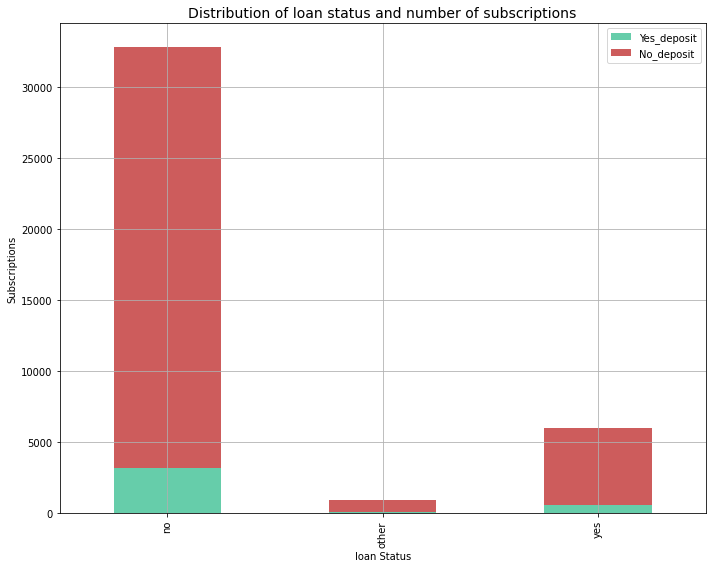

In [ ]:
Temp7= pd.DataFrame()
sp=dfb[dfb['pdays']>0]
dfb_yes=sp[sp['y'] == 'yes']
Temp7['Yes_deposit'] = dfb_yes.groupby(['loan'])['y'].count()
dfb_no = sp[sp['y'] == 'no']
Temp7['No_deposit'] = dfb_no.groupby(['loan'])['y'].count()


Temp7.plot.bar(stacked=True,color={"No_deposit": "IndianRed", "Yes_deposit": "MediumAquamarine"})
plt.grid(zorder=3)
plt.xlabel('loan Status', fontsize=10)
plt.ylabel('Subscriptions', fontsize=10)
plt.title('Distribution of loan status and number of subscriptions', loc='Center', fontsize=14)
plt.show()

**Conclusion:**

>

* The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories below 30 years old and above 50 years old.
* Number of contacts with the customer during the campaign is also very important. The number of contacts during the present campaign with the customer shouldn't exceed 5 in order to obtain 60% of subscription rates.
* The last conact time after previous should be 22 days to stay connected with the clients and obtain higher subscription rates.
* Also, higher subscription rates are observed when contacted students and retired people.
* Average duration of the call highly effects subdcription rates. It is also dependent on the age, education and job categories.
*  Higher subscription rates are observed in the months of march and december.

From these conclusions, targeting people with age less than 30 or more than 60 and contacting them less than 5 times and talking to them less than 400 sec could improve chances of securing a subscription.














Thinking outside the box and implementing creative marketing ideas for banks will help you to develop creative campaigns, benefiting your bank, consumer engagement, and likely the success of the actual bank marketing campaigns as well. Most consumers see banking as a mundane necessity, something they’d rather avoid if they could. Taking a creative approach to bank marketing campaigns might change that, especially if you integrate creative marketing ideas for banks like gamification, automation, chatbots, and rewards so that consumers are motivated to use your services.

**Creative Marketing Ideas for Banks:**
1. Location-Based Advertising
2. Gamification in FinTech
3. Make Customer Service Fun!
4. Highlight Success Stories
5. Social Media Personality
6. Partnerships
7. Reward Users for Engagement


1. **Location-Based Advertising for Banks**

  No matter how big or small your bank is, where your bank is located plays a vital role in how you promote and advertise it. Your physical presence can have a significant impact on your marketing efforts, regardless of your budget, technology, or target audience.

  Let's take an example from 2008 when HSBC wanted to make people in Australia aware of their personal banking services. At that time, most locals didn't know about HSBC as a brand or as a personal bank. HSBC came up with a clever advertising idea by printing origami folding instructions on receipts. This unique approach sparked conversations and increased engagement with the bank. You can also use other creative marketing ideas to generate interest and engagement in your bank's physical location. For instance, you can offer in-person consultations and provide information right at your bank. Some banks, like Virgin Money in the UK, have introduced lounges where anyone can relax and enjoy, attracting customers and driving engagement.

  Another important aspect is to shift the focus from traditional tellers to self-service options like smart ATMs and computers. This not only helps in reducing the costs associated with maintaining physical branches but also allows you to offer more locations and better services. Banks such as JP Morgan Chase and Bank of America have already taken steps in this direction, resulting in increased customer engagement because people don't have to wait in line for a teller.

2. **Take Advantage of Gamification in FinTech**

  Today, people who use apps and digital things expect them to be fun. This is a good chance for banks to come up with creative ideas to get people interested in their services. One way to do this is through gamification, which means using game-like elements to get people involved and excited.

  Many banks are using gamification to encourage people to save money and manage their budget. For example, Wells Fargo has a feature in their app that encourages users to make money-saving choices, like making their own lunch instead of buying it. When users take part in this challenge, they earn savings that go straight into their savings account.

  PNC's Virtual Wallet has a similar idea. They have pop-up messages that remind customers to put money into specific accounts for their goals, like saving for something special.

  Emirates NBD took a different approach to gamification. They created a Fitness Account that connects with fitness trackers like Fitbit. Customers earn rewards for reaching a certain number of steps each day. If they reach 12,000 steps, they can earn up to 2% interest on their savings account. This gives people a big incentive to deposit more money.

  So, banks are finding clever ways to make banking more enjoyable and motivating by using gamification techniques

3. **How to Improve Customer Service in Banks? Make It Fun!**

  Many times, customers have simple questions about using certain features, asking for money, or getting information about opening accounts or new services. To make customer service more interesting, you can try using different ways to engage customers and get them talking. One option is to use AI chatbots, which can provide help and information just like regular customer service, but with an extra touch of interest. Another idea is to introduce fun digital learning portals where users can learn about the platform, their finances, and other financial education. This adds an exciting element to customer service and helps with your bank's marketing efforts.

4. **Boost Bank Marketing Campaigns by Highlighting Success Stories**

  If your bank has been around for a long time, it means it has probably helped many people achieve success. This is a valuable resource for your bank's marketing campaigns, and it's important to use it. When you lend money, give mortgages, or offer savings and bonds, your main goal should be to benefit the customer. By sharing these success stories in your marketing efforts, you can promote your bank, build trust, and show that you genuinely care about your customers. Allstate's "Worth Telling" campaign showcased stories of individual customers who had achieved success thanks to loans or assistance from the bank. They shared interviews, customer stories, and other information about real people who had benefited from the bank's services.

5. **Create a Social Media Personality**

  Social media is a part of our lives that is not going away. It's likely that your bank already uses social media to promote itself. However, most banks use social media in a traditional and sometimes boring way. On the other hand, big companies in other industries are using social media in a fun and engaging way to connect with customers and build loyalty. For example, Denny's, a restaurant chain, has a very popular social media presence because they engage with people in a genuine way. Your bank doesn't have to be as bold as Denny's, but it's a good idea to create a real personality on social media, have fun, and provide consistent customer service and interaction. If customers see that you're there to entertain and engage with them, rather than just trying to sell products, they'll be more likely to follow your page or channel.

6. **Develop Partnerships and Leverage Them**

  Working together with universities, colleges, real estate agencies, or car dealerships can be really helpful for our bank. We can team up with them to create valuable offers for our partners and customers, which can bring in more business. Let me give you a few examples:

  1. We can join forces with educational institutions to provide financial education and courses. This way, we can help students of all ages learn about managing money wisely. It's important for them to understand finances, and we can make it easier for them.

  2. We can also partner with car dealerships or real estate agencies to make it super fast and easy for customers to get approved for loans. Customers can start the loan application process right at the dealership or agency, and we'll have all the necessary information about the car or property they're interested in.

  By forming these partnerships, we can reach out to customers exactly where they need assistance, whether it's information or actual services. However, it's crucial to make sure that any partnership we establish benefits everyone involved.

7. **Reward Users for Engagement**

  Engaging with customers is very important for banks to keep them interested and informed. Whether it's through online platforms, in-person interactions, events, or bank branches, engagement plays a key role. One effective way to encourage engagement is by creating reward programs. These programs can be profitable for the bank and help maintain customer engagement.

  Here are some examples of how reward programs can be implemented:

  1. Social Media Check-ins: You can reward users who check into your bank on platforms like Facebook or Foursquare. This encourages customers to visit your bank and stay connected.

  2. Digital Banking and Budgeting: Create a reward program for customers who actively use digital banking services and manage their budget on a daily or weekly basis. This encourages them to adopt these convenient methods.

  3. Adoption of New Programs: When launching a new mobile app, you can offer rewards to customers who download and consistently use it. This promotes the adoption of the new app.

  4. The rewards can vary, such as giving customers a chance to win double their deposits or paying for their purchases. You can also introduce a point system. The important thing is that the rewards should be tangible and significant enough to motivate customers to change their behavior.

It's worth noting that you don't necessarily have to spend a lot of money to reward customer behavior. Encouraging customers to switch from using tellers to primarily using digital banking can save the bank millions of dollars annually. Investing some of those savings in promoting adoption during the initial years can yield long-term benefits for the bank.

**What is Deposit?**

A deposit is a financial term that means money held at a bank. A deposit is a transaction involving a transfer of money to another party for safekeeping. However, a deposit can refer to a portion of money used as security or collateral for the delivery of a good.

**How a Deposit Works:**

A deposit encompasses two different meanings. One kind of deposit involves a transfer of funds to another party for safekeeping. Using this definition, deposit refers to the money an investor transfers into a savings or checking account held at a bank or credit union.

In this case, we are going to analyze and predict which customer has deposit or liklyhood to put deposit

In [ ]:
# Importing required Libraries

import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import pickle
import plotly.graph_objects as go
import plotly.express as px
from sklearn.svm import SVC
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset

df = pd.read_csv('bank.csv')

In [ ]:
# EDA

class EDA:

    def row(self,data):
        fig = make_subplots(rows=1, cols=2)
        fig.add_trace(go.Indicator(mode = "number", value = data.shape[0], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "🧾 Rows<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0, 0.5], 'y': [0.6, 1]}))
        fig.add_trace(go.Indicator(mode = "number", value = data.shape[1], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "⭕ Columns<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0.5, 1], 'y': [0, 0.4]}))
        fig.show()

    def border_msg(self,msg, indent=1, width=None, title=None):
        """Print message-box with optional title."""
        lines = msg.split('\n')
        space = " " * indent
        if not width:
            width = max(map(len, lines))
        box = f'╔{"═" * (width + indent * 2)}╗\n'
        if title:
            box += f'║{space}{title:<{width}}{space}║\n'
            box += f'║{space}{"-" * len(title):<{width}}{space}║\n'
        box += ''.join([f'║{space}{line:<{width}}{space}║\n' for line in lines])
        box += f'╚{"═" * (width + indent * 2)}╝'
        print('\033[92m'+'\033[1m')
        print(box)

    def distribution(self,x,title):
        plt.figure(figsize=(10,8))
        ax = sns.distplot(x, kde=False,bins=30)
        values = np.array([rec.get_height() for rec in ax.patches])
        norm = plt.Normalize(values.min(), values.max())
        colors = plt.cm.jet(norm(values))
        for rec, col in zip(ax.patches,colors):
            rec.set_color(col)
        plt.title(title, size=20, color='black')

    def run(self,df):

        self.row(df)
        if len(df)>0:

            object_df = df.select_dtypes('object').columns.tolist()
            int_df = df.select_dtypes('int').columns.tolist()
            bool_df = df.select_dtypes('bool').columns.tolist()
            float_df = df.select_dtypes('float').columns.tolist()

            if len(object_df)>0:

                print( '\033[1m'+"OBJECT TYPE")
                for col in object_df:
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    self.border_msg('There are {} unique values in {} column'.format(df[col].nunique(),col.upper()))
                    plt.figure(figsize=(10,5))
                    sns.countplot(y = col, data = df,
                                  order = df[col].value_counts().index)
                    plt.show()

            if len(int_df)>0:

                print('\033[1m'+"INT TYPE")
                for col in int_df:
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    self.border_msg('Average value is : {}'.format(df[col].mean()))
                    self.border_msg('Minumum value is : {}'.format(df[col].min()))
                    self.border_msg('Maximum value is : {}'.format(df[col].max()))
                    self.distribution(df[col],title=col)
                    if df[col].mean()>df[col].std():
                        print(self.border_msg("Normal distributed Data Located below mean"))

                    elif df[col].mean()<df[col].std():
                        print(self.border_msg("Normal distributed Data Located above mean"))
                    else:
                        self.border_msg("Mean Equals Std Dev - Distribution is normal")

                    fig = make_subplots(rows=1, cols=2)
                    fig.add_trace(go.Indicator(mode = "number", value = df[col].mean(), number={'font':{'color': '#E58F65','size':100}}, title = {"text": "📌 Mean<br><span style='font-size:0.8em;color:gray'></span>"}, domain = {'x': [0, 0.5], 'y': [0.6, 1]}))
                    fig.add_trace(go.Indicator(mode = "number", value = df[col].std(), number={'font':{'color': '#E58F65','size':100}}, title = {"text": "🖇 Standart dev<br><span style='font-size:0.8em;color:gray'></span>"}, domain = {'x': [0.5, 1], 'y': [0, 0.4]}))
                    fig.show()
                    plt.show()


            if len(bool_df)>0:

                print('\033[1m'+"BOOL TYPE")
                for col in bool_df:
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    plt.figure(figsize=(10,5))
                    sns.countplot(y = col, data = df,
                                  order = df[col].value_counts().index)
                    plt.show()

            if len(float_df)>0:

                print('\033[1m'+"FLOAT TYPE")
                for col in float_df:
                    for col in int_df:
                        self.distribution(df[col],title=col)
                        if df[col].mean()>df[col].std():
                            print(self.border_msg("Normal distributed Data Located below mean"))

                        elif df[col].mean()<df[col].std():
                            print(self.border_msg("Normal distributed Data Located above mean"))
                        else:
                            self.border_msg("Mean Equals Std Dev - Distribution is normal")



OBJECT TYPE

╔═══════════════════════════════════════════════════════╗
║                          JOB                          ║
╚═══════════════════════════════════════════════════════╝

╔══════════════════════════════════════════╗
║ There are 12 unique values in JOB column ║
╚══════════════════════════════════════════╝


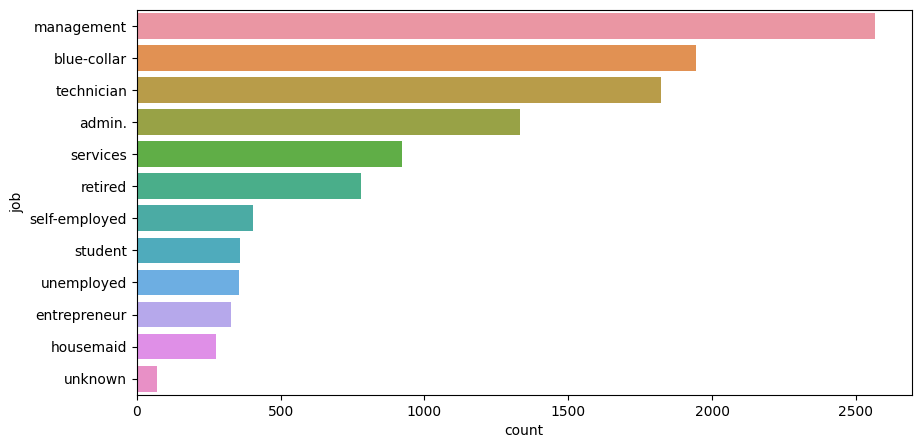


╔═══════════════════════════════════════════════════════════╗
║                          MARITAL                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 3 unique values in MARITAL column ║
╚═════════════════════════════════════════════╝


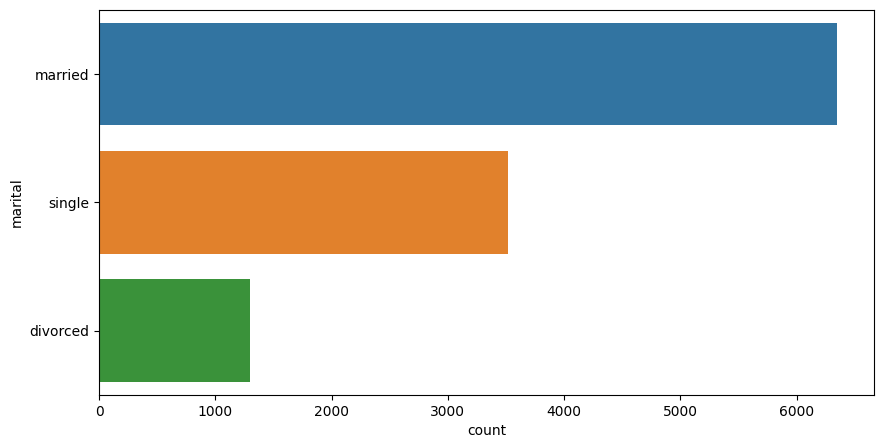


╔═════════════════════════════════════════════════════════════╗
║                          EDUCATION                          ║
╚═════════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════════════╗
║ There are 4 unique values in EDUCATION column ║
╚═══════════════════════════════════════════════╝


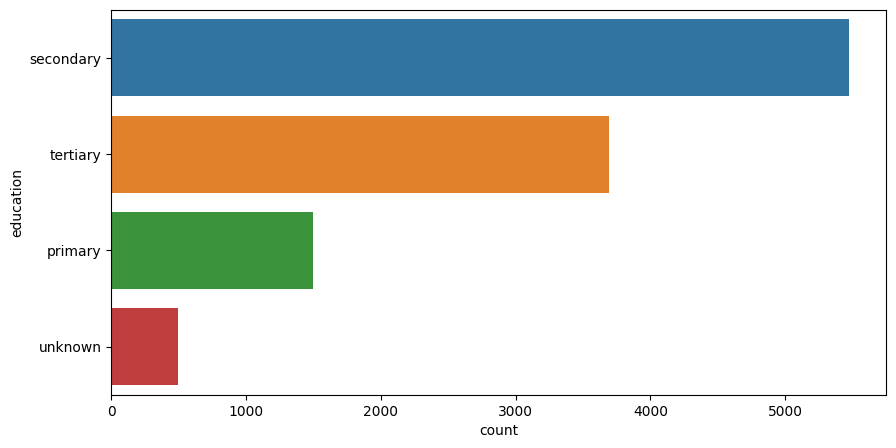


╔═══════════════════════════════════════════════════════════╗
║                          DEFAULT                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 2 unique values in DEFAULT column ║
╚═════════════════════════════════════════════╝


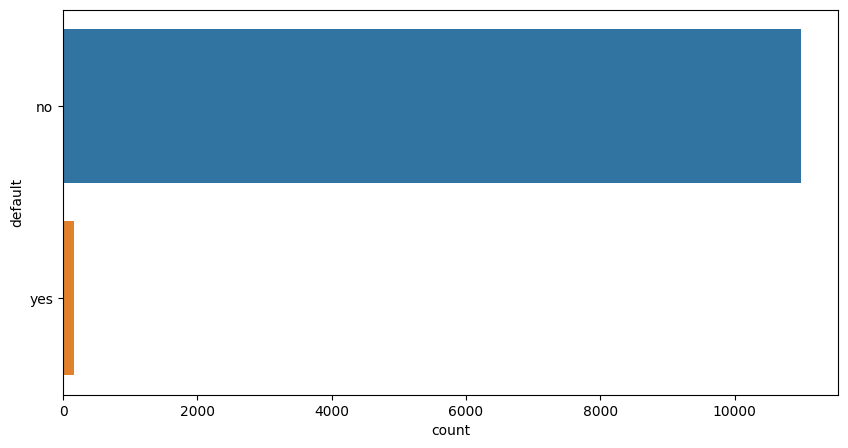


╔═══════════════════════════════════════════════════════════╗
║                          HOUSING                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 2 unique values in HOUSING column ║
╚═════════════════════════════════════════════╝


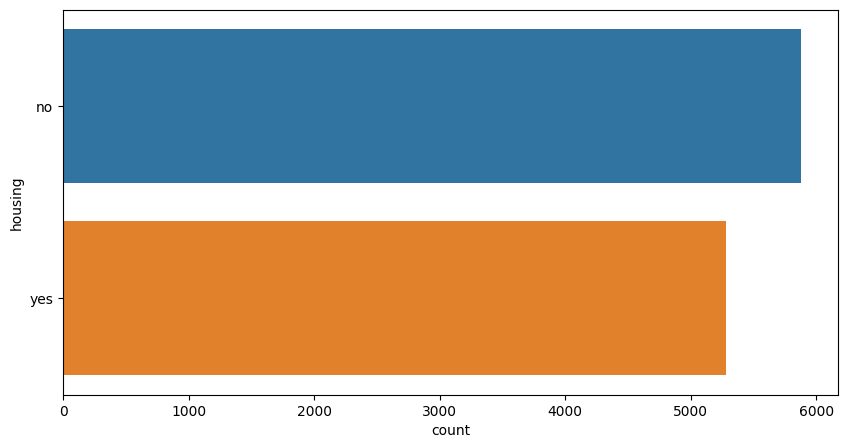


╔════════════════════════════════════════════════════════╗
║                          LOAN                          ║
╚════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════╗
║ There are 2 unique values in LOAN column ║
╚══════════════════════════════════════════╝


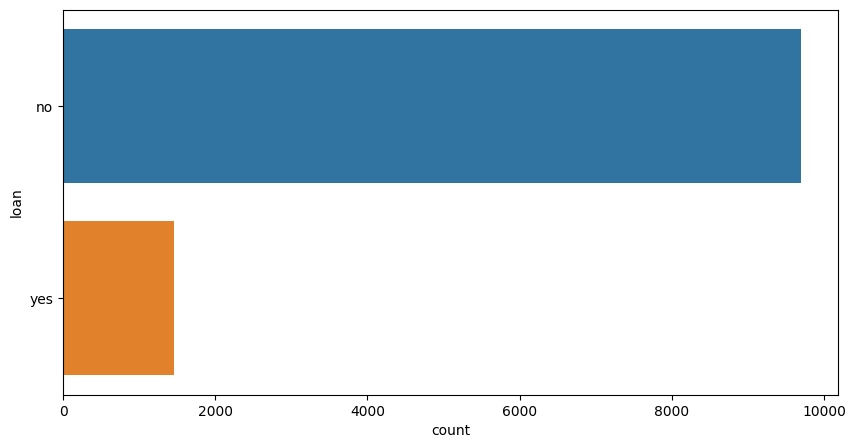


╔═══════════════════════════════════════════════════════════╗
║                          CONTACT                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 3 unique values in CONTACT column ║
╚═════════════════════════════════════════════╝


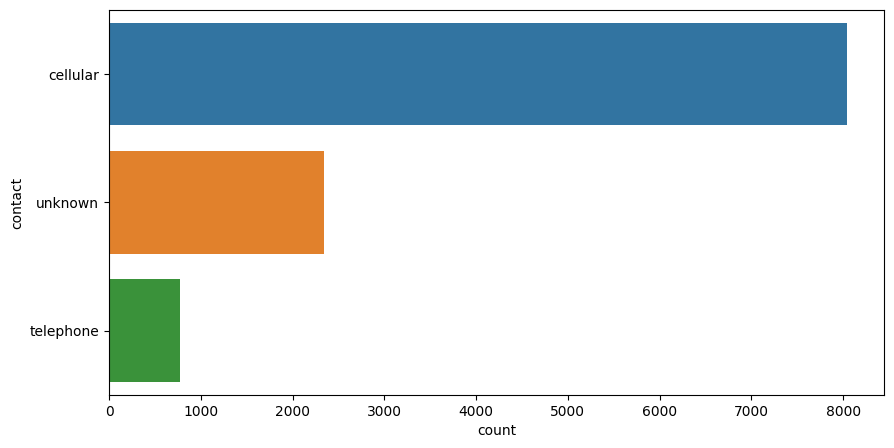


╔═════════════════════════════════════════════════════════╗
║                          MONTH                          ║
╚═════════════════════════════════════════════════════════╝

╔════════════════════════════════════════════╗
║ There are 12 unique values in MONTH column ║
╚════════════════════════════════════════════╝


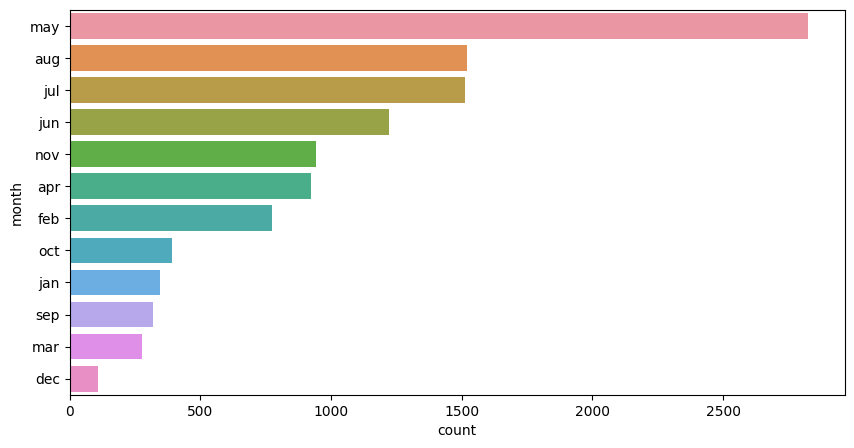


╔════════════════════════════════════════════════════════════╗
║                          POUTCOME                          ║
╚════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════╗
║ There are 4 unique values in POUTCOME column ║
╚══════════════════════════════════════════════╝


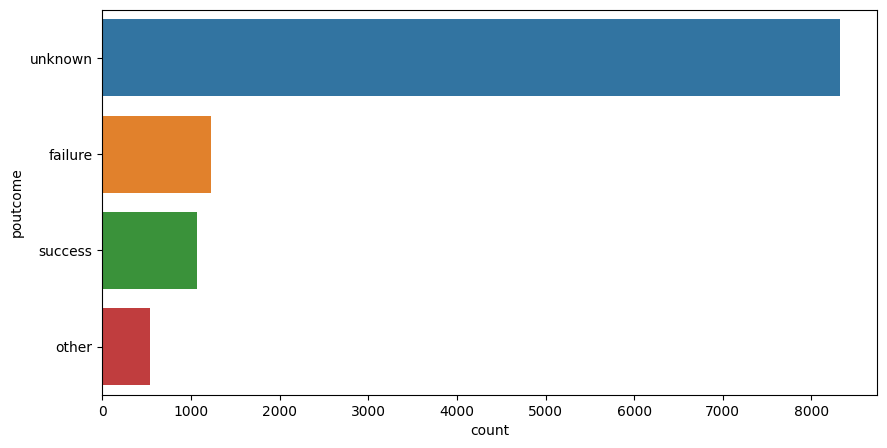


╔═══════════════════════════════════════════════════════════╗
║                          DEPOSIT                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 2 unique values in DEPOSIT column ║
╚═════════════════════════════════════════════╝


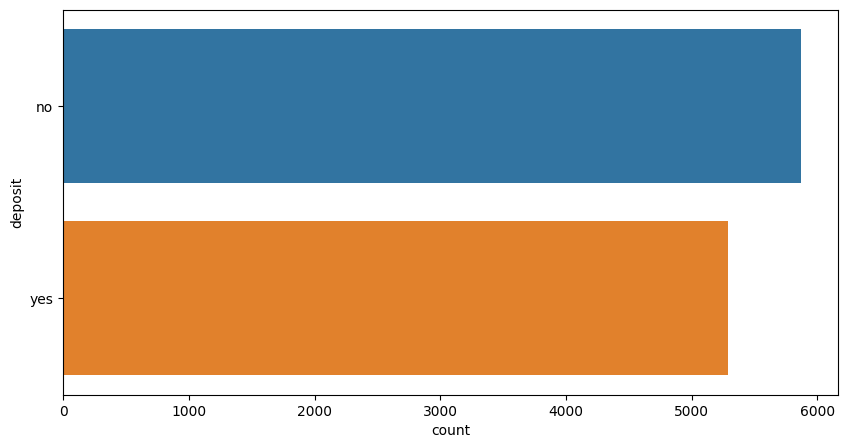

INT TYPE

╔═══════════════════════════════════════════════════════╗
║                          AGE                          ║
╚═══════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 41.231947679627304 ║
╚═══════════════════════════════════════╝

╔═══════════════════════╗
║ Minumum value is : 18 ║
╚═══════════════════════╝

╔═══════════════════════╗
║ Maximum value is : 95 ║
╚═══════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located below mean ║
╚════════════════════════════════════════════╝
None


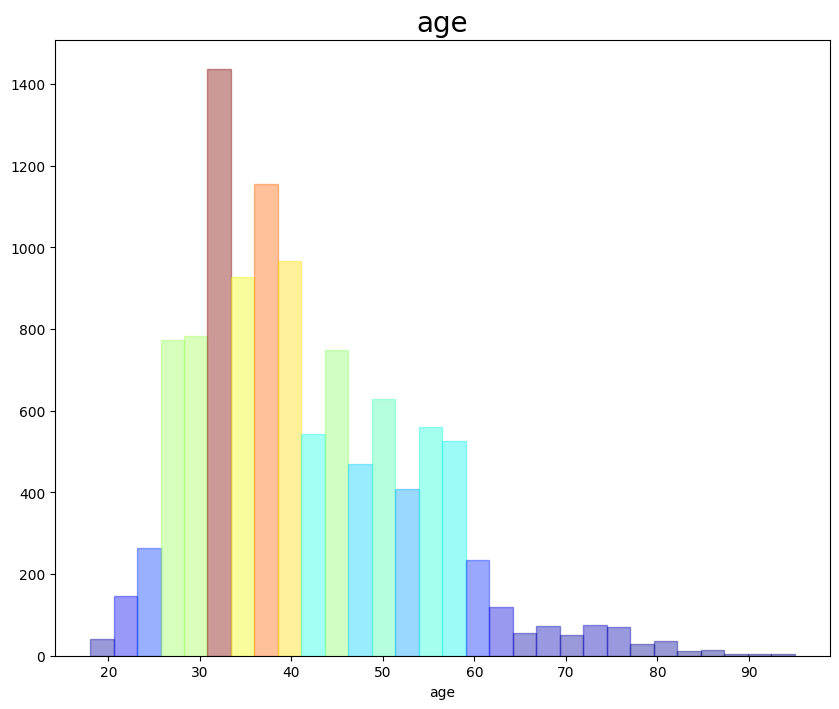


╔═══════════════════════════════════════════════════════════╗
║                          BALANCE                          ║
╚═══════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 1528.5385235620856 ║
╚═══════════════════════════════════════╝

╔══════════════════════════╗
║ Minumum value is : -6847 ║
╚══════════════════════════╝

╔══════════════════════════╗
║ Maximum value is : 81204 ║
╚══════════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


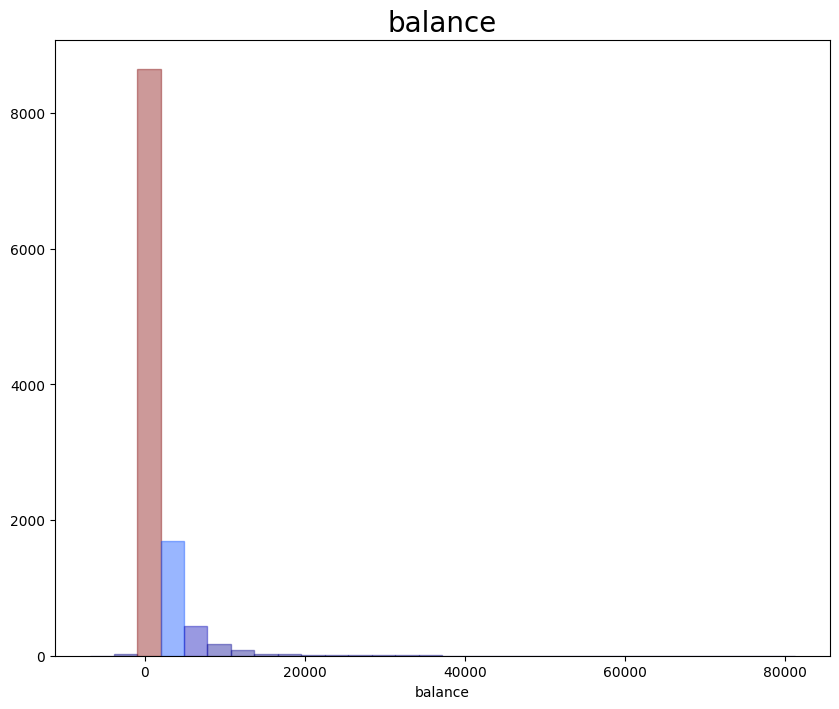


╔═══════════════════════════════════════════════════════╗
║                          DAY                          ║
╚═══════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 15.658036194230425 ║
╚═══════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 1 ║
╚══════════════════════╝

╔═══════════════════════╗
║ Maximum value is : 31 ║
╚═══════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located below mean ║
╚════════════════════════════════════════════╝
None


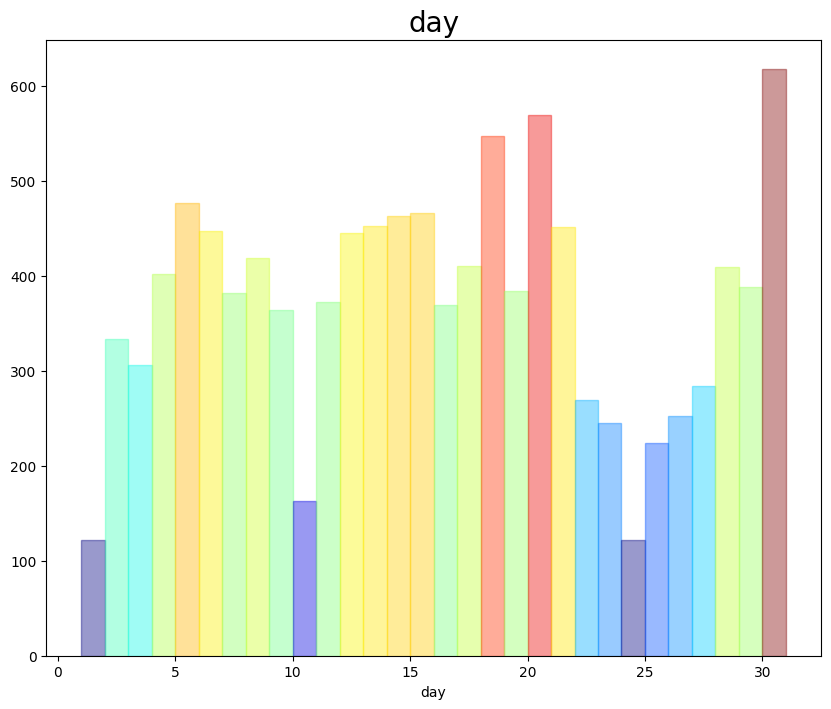


╔════════════════════════════════════════════════════════════╗
║                          DURATION                          ║
╚════════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 371.99381831213043 ║
╚═══════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 2 ║
╚══════════════════════╝

╔═════════════════════════╗
║ Maximum value is : 3881 ║
╚═════════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located below mean ║
╚════════════════════════════════════════════╝
None


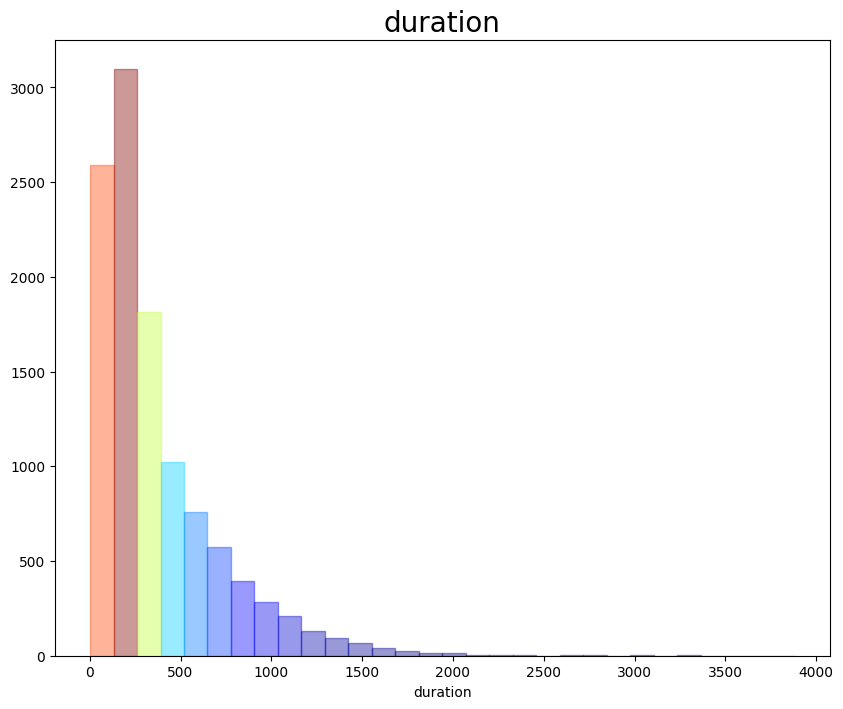


╔════════════════════════════════════════════════════════════╗
║                          CAMPAIGN                          ║
╚════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════╗
║ Average value is : 2.508421429851281 ║
╚══════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 1 ║
╚══════════════════════╝

╔═══════════════════════╗
║ Maximum value is : 63 ║
╚═══════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


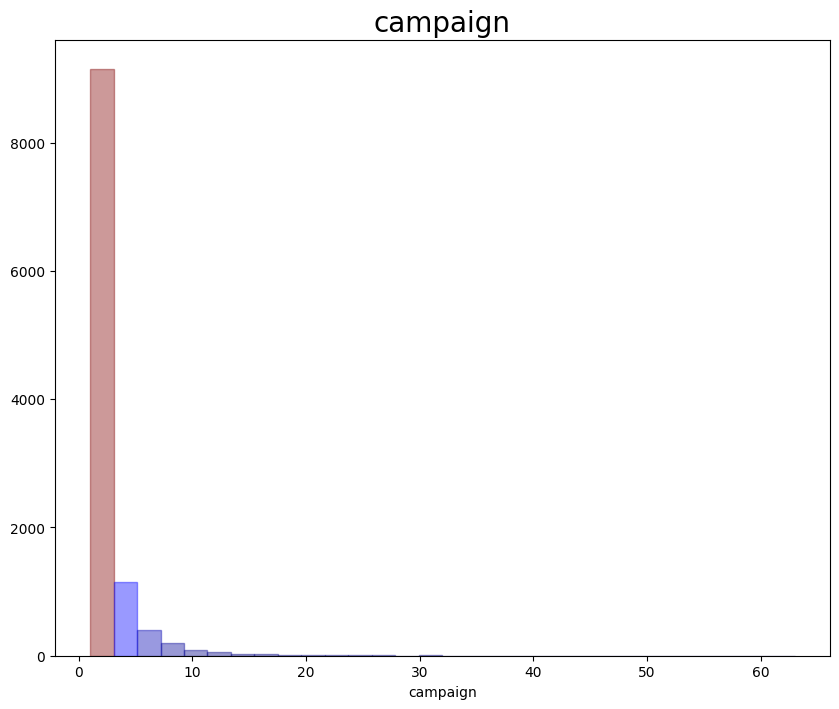


╔═════════════════════════════════════════════════════════╗
║                          PDAYS                          ║
╚═════════════════════════════════════════════════════════╝

╔══════════════════════════════════════╗
║ Average value is : 51.33040673714388 ║
╚══════════════════════════════════════╝

╔═══════════════════════╗
║ Minumum value is : -1 ║
╚═══════════════════════╝

╔════════════════════════╗
║ Maximum value is : 854 ║
╚════════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


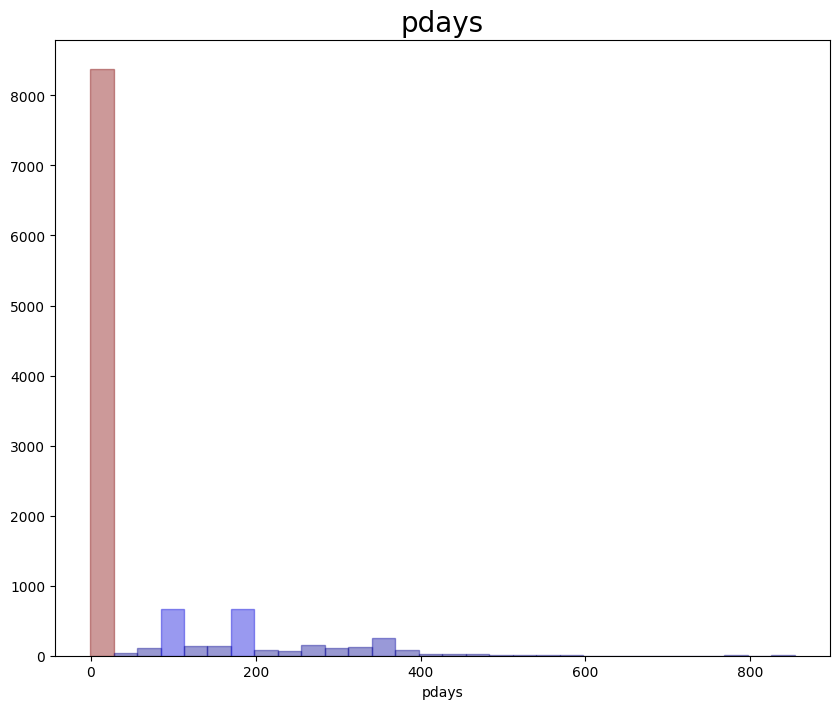


╔════════════════════════════════════════════════════════════╗
║                          PREVIOUS                          ║
╚════════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 0.8325568894463358 ║
╚═══════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 0 ║
╚══════════════════════╝

╔═══════════════════════╗
║ Maximum value is : 58 ║
╚═══════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


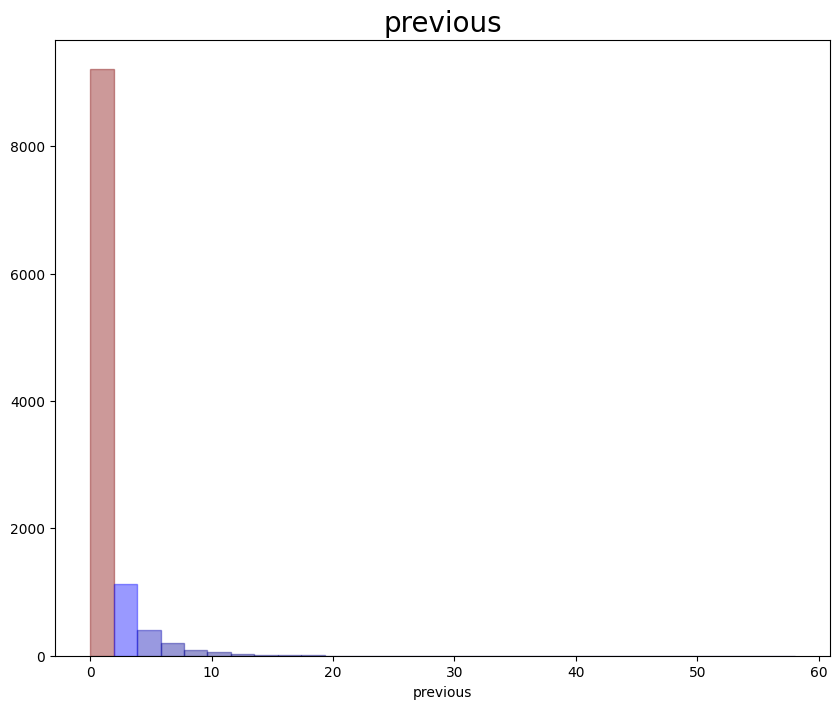

In [ ]:
frame = EDA().run(df)

As we can see Management more liklyhood to put deposit.
So, lets explore more information.
We agree that most active balance and most deposit account mostly are managemnet. Does martial status has impact on deposit ?


In [ ]:
management = df[df.job=='management']
fig = px.box(management, x="marital", y="balance",
             color="deposit", points="all",
            )
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(
    title={
         'text': "Management behavior on deposit",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Martial Status",
    yaxis_title="Active Balance",
    legend_title="Deposit Status",
    font=dict(
        family="Arial",
        size=18,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()

In [ ]:
technician = df[df.job=='technician']
fig = px.box(technician, x="marital", y="balance",
             color="deposit", points="all",
            )
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(
    title={
         'text': "Technician behavior on deposit",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Martial Status",
    yaxis_title="Active Balance",
    legend_title="Deposit Status",
    font=dict(
        family="Arial",
        size=18,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()

In [ ]:
blue = df[df.job=='blue-collar']
fig = px.box(blue, x="marital", y="balance",
             color="deposit", points="all",
            )
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(
    title={
         'text': "Blue-Collar behavior on deposit",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Martial Status",
    yaxis_title="Active Balance",
    legend_title="Deposit Status",
    font=dict(
        family="Arial",
        size=20,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()

Does Education and Martial Status related on deposit ?

According to educational status, marital status somehow affected active balance.

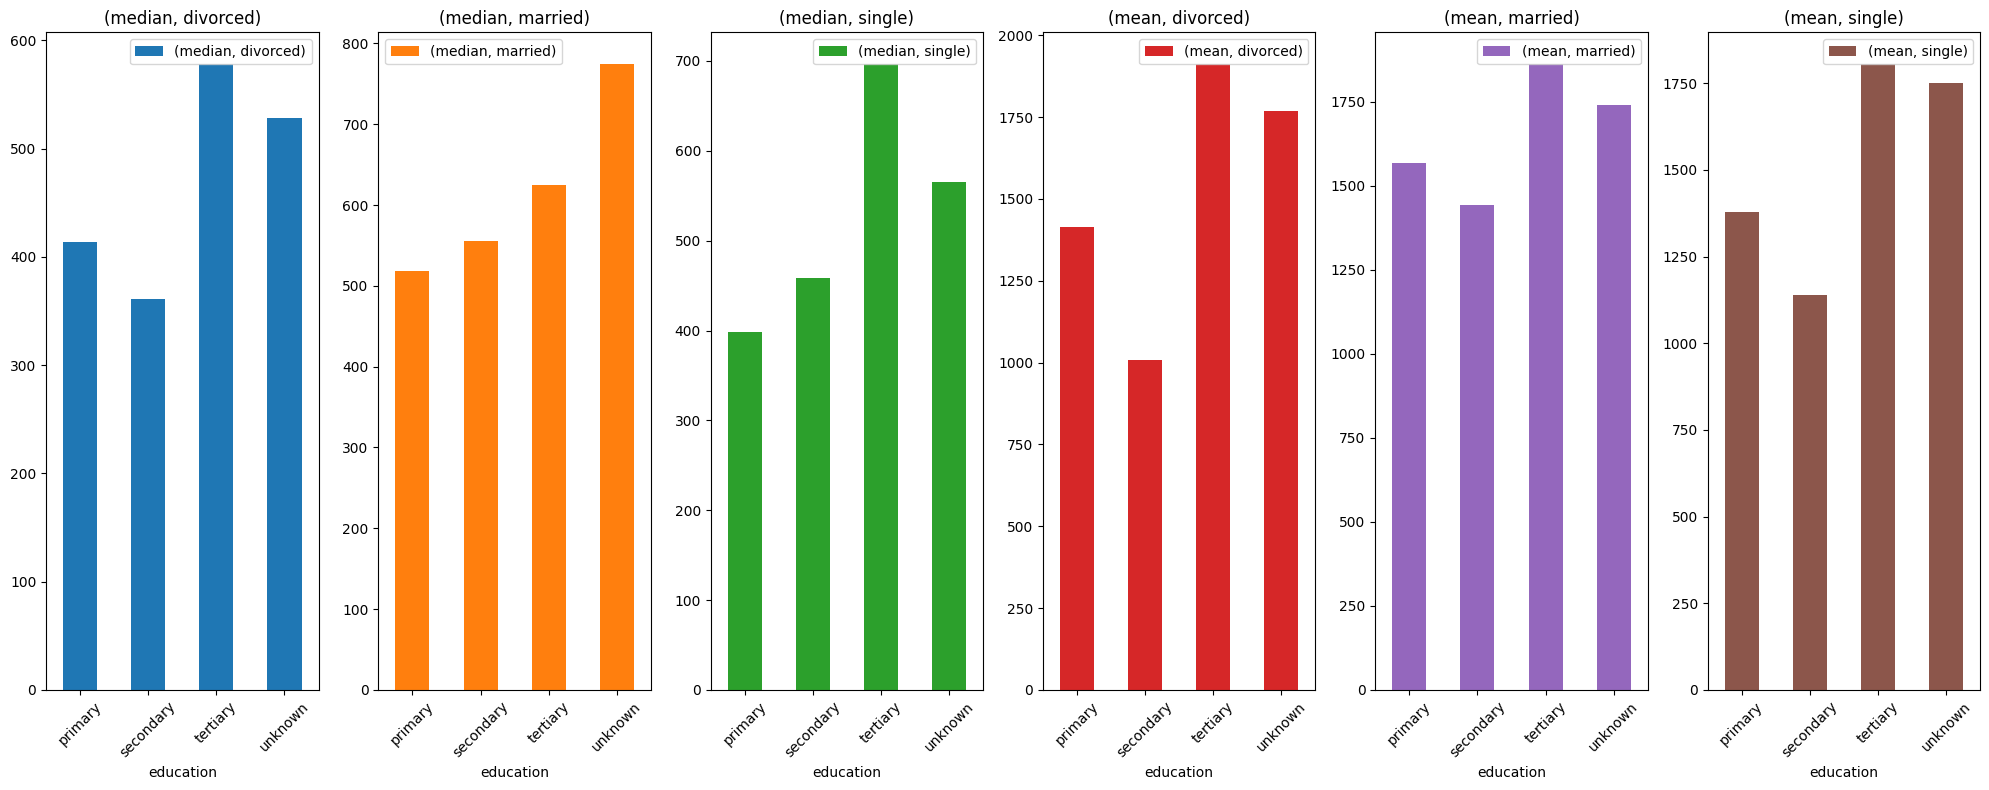

In [ ]:
education= df.groupby(['marital','education'], as_index=False)['balance'].agg({np.median,np.mean})
education = round(education,2)

ax = education.unstack(level=0).plot(kind='bar', subplots=True, rot=45, figsize=(20, 8), layout=(1, 6))
plt.tight_layout()


What could be the reason low balance? does anything effect balance?

In [ ]:
fig = px.scatter(df, x="balance", y="duration", color="marital",
                 marginal_x="box", marginal_y="violin",
                  title="Click on the legend items!")
fig.update_layout(
    title={
         'text': "Purpose Of Low Amount Of Balance.",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Duration",
    yaxis_title=" Balance",
    legend_title="Marital Status",
    font=dict(
        family="Arial",
        size=20,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()

**Marital Status:**

As discussed previously, the impact of a divorce has a significant impact on the balance of the individual.

**Education: **

The level of education also has a significant impact on the amount of balance a prospect has.

**Loans: **

Whether the prospect has a previous loan has a significant impact on the amount of balance he or she has.**

<Axes: xlabel='deposit', ylabel='count'>

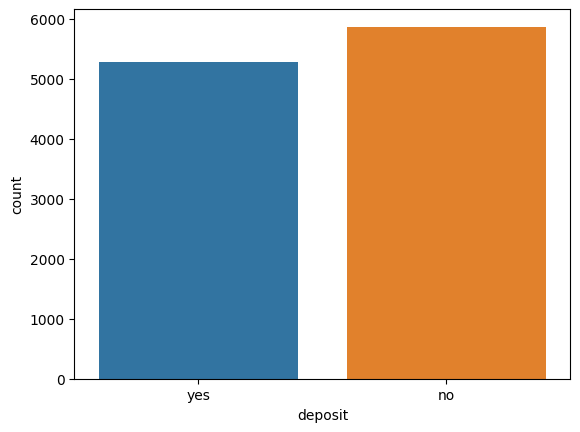

In [ ]:
# Target

sns.countplot(data=df,x='deposit')

It is really good that we have almost same amount of data for each class.

In [ ]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

Before we split the data we need to encode categorical column. For this purpose we are going to use 2 different method

1. Label Encoder
2. One-Hot Encoder

In [ ]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

**What is a label encoder?**

Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering

In [ ]:
le = LabelEncoder()
df.marital = le.fit_transform(df.marital)
df.housing = le.fit_transform(df.housing)
df.deposit = le.fit_transform(df.deposit)
df.loan = le.fit_transform(df.loan)
df.default = le.fit_transform(df.default)

**One-Hot Encoder**

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

In [ ]:
def get_encoder_inst(feature_col):

    assert isinstance(feature_col, pd.Series)
    feature_vec = feature_col.sort_values().values.reshape(-1, 1)
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(feature_vec)

    filename = '.pickle'
    pickle.dump(enc, open(filename, 'wb'))
    return enc

def get_one_hot_enc(feature_col,enc,cols):

    assert isinstance(feature_col, pd.Series)
    assert isinstance(enc, OneHotEncoder)
    unseen_vec = feature_col.values.reshape(-1, 1)
    encoded_vec = enc.transform(unseen_vec).toarray()
    column_name = enc.get_feature_names_out([cols])
    encoded_df = pd.DataFrame(encoded_vec, columns= column_name)
    return encoded_df

In [ ]:
# Lets create categorical list

ohe_cat_list = ['job','education','month','contact','poutcome']
ohe_cat_data = df[ohe_cat_list]
df.drop(ohe_cat_list,axis=1,inplace=True)

In [ ]:
data_list = []
for cols in ohe_cat_data.columns:
    encoder = get_encoder_inst(ohe_cat_data[cols])
    one = get_one_hot_enc(ohe_cat_data[cols],encoder,cols)
    data_list.append(one)

final_ohe = pd.concat(data_list,axis=1)
df.reset_index(drop=True, inplace=True)
final_ohe.reset_index(drop=True, inplace=True)
for cols in final_ohe.columns:
    final_ohe[cols] = final_ohe[cols].astype('int')

In [ ]:
df = pd.concat([df,final_ohe],axis=1)

In [ ]:
# Split Data

X = df.drop('deposit',axis=1)
y = df[['deposit']]

In [ ]:
# K-Fold

KF = KFold(n_splits=3,shuffle=True)
for train_index, test_index in KF.split(X):
    x_train, x_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

In [ ]:
print("Train data shape:{}".format(x_train.shape))
print("Test data shape:{}".format(x_test.shape))

Train data shape:(7442, 46)
Test data shape:(3720, 46)


In [ ]:
# Scaling Data

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(x_train)
scaled_test = scaler.transform(x_test)

**Model**

The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks.
The intuition behind the Decision-Tree algorithm is very simple to understand.

The Decision Tree algorithm intuition is as follows:-
For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node.

For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.

In [ ]:
# Model

dt = DecisionTreeClassifier()

In [ ]:
dt.fit(scaled_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred = dt.predict(scaled_test)

In [ ]:
accuracy_score(y_test,pred)

0.7784946236559139

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator
             }

In [ ]:
tune_model = GridSearchCV(DecisionTreeClassifier(),
                          param_grid=param_grid,
                          scoring = 'roc_auc',
                          cv = 5,
                          verbose=0)
tune_model.fit(scaled_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'max_features': [None, 'auto'],
                         'min_samples_leaf': [1, 5, 10, 0.03, 0.05],
                         'min_samples_split': [2, 5, 10, 0.03, 0.05],
                         'random_state': [0], 'splitter': ['best', 'random']},
             scoring='roc_auc')

In [ ]:
print('\033[1m'+'Decision Tree Parameters:{} '.format(tune_model.best_params_))

Decision Tree Parameters:{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 0.03, 'random_state': 0, 'splitter': 'best'} 


In [ ]:
dt_tuned =  DecisionTreeClassifier(criterion='gini',
                                   min_samples_split=0.03,
                                   max_depth=None,
                                    max_features = None,
                                   min_samples_leaf=10,
                                   random_state = 0,
                                   splitter='random')

dt_tuned.fit(scaled_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=0.03,
                       random_state=0, splitter='random')

In [ ]:
pred = dt_tuned.predict(scaled_test)

In [ ]:
accuracy_score(y_test,pred)

0.8155913978494623

In [ ]:
cm = classification_report(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1939
           1       0.81      0.81      0.81      1781

    accuracy                           0.82      3720
   macro avg       0.82      0.82      0.82      3720
weighted avg       0.82      0.82      0.82      3720



NameError: ignored

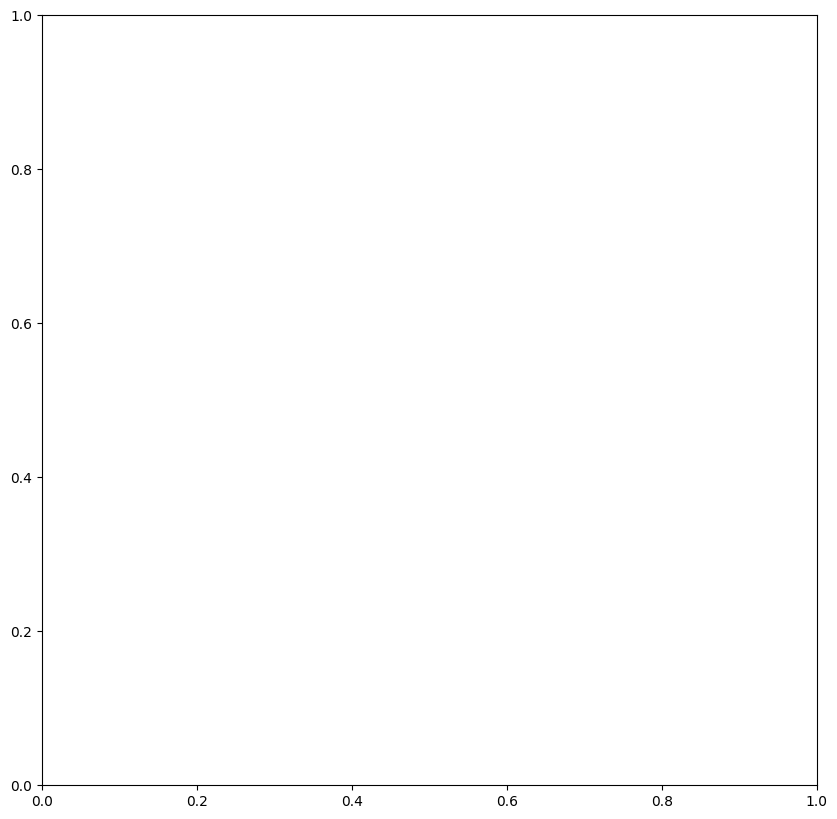

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(dt_tuned,scaled_test,y_test,ax=ax)

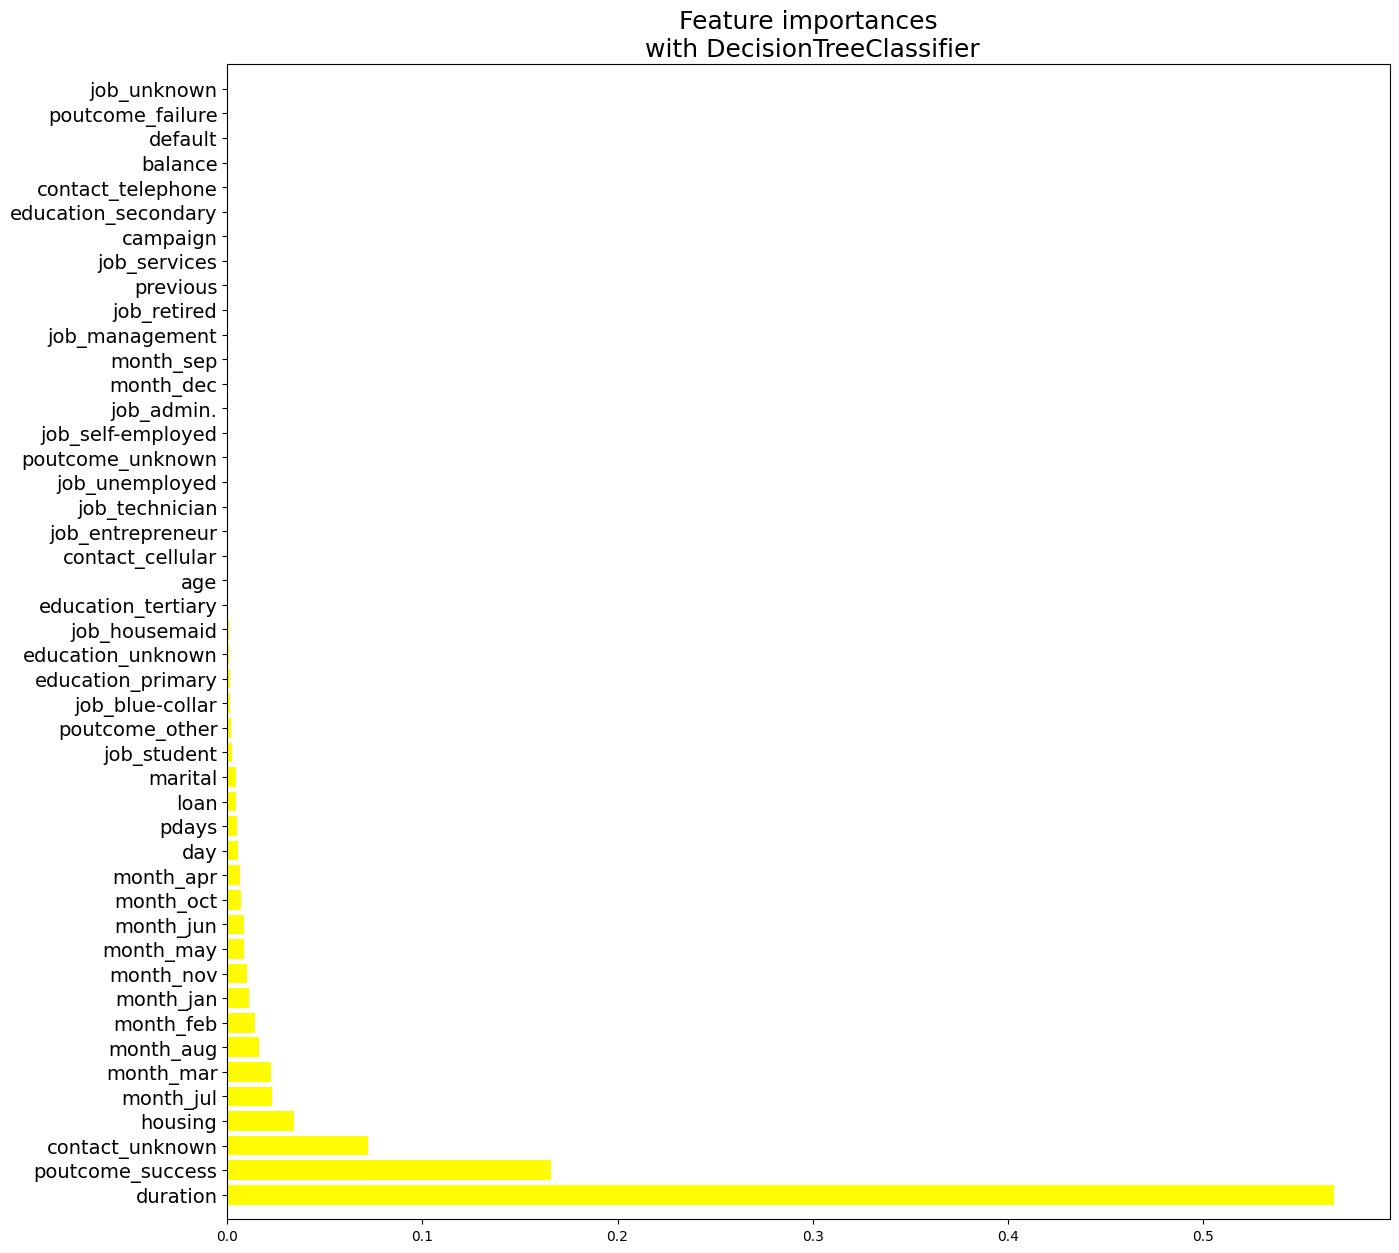

In [ ]:
tree_model = dt_tuned.fit(scaled_train, y_train)
importances = tree_model.feature_importances_
feature_names = df.drop('deposit', axis=1).columns
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(15,15))
    plt.title(" Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#fffb00',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])

feature_importance_graph(indices, importances, feature_names)
plt.show()

In [ ]:
# Determining Best Threshold
## We are going to use precision and recall tradeoff technique.
## How can we decide which threshold to use? We want to return the scores instead of predictions with this code.

y_scores = dt_tuned.predict_proba(scaled_train)

if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores,)

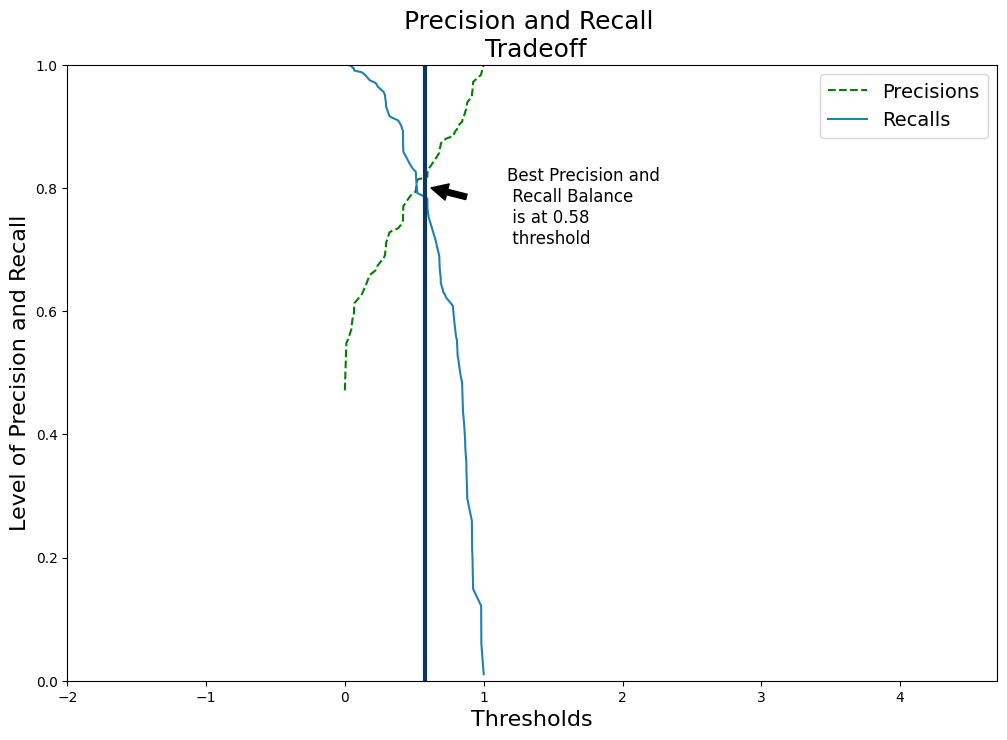

In [ ]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "g--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#1e81b0", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.58, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.58 \n threshold ', xy=(0.62, 0.80), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.5),
                fontsize=12,
                color='k')
    plt.show()

precision_recall_curve(precisions, recalls,threshold)

NameError: ignored

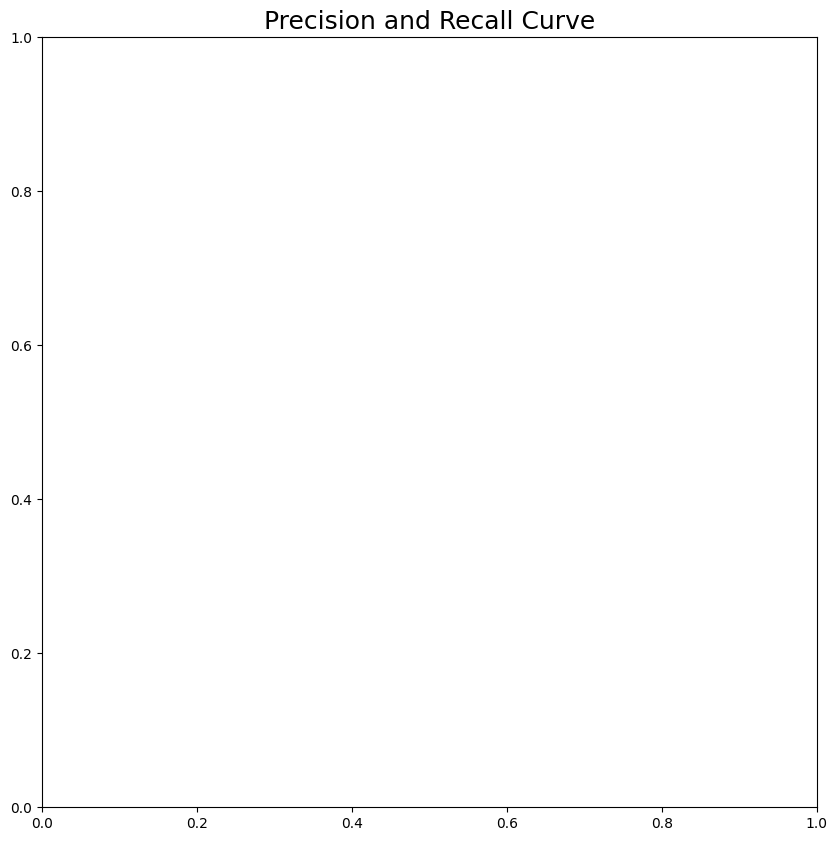

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Precision and Recall Curve", fontsize=18)
plot_precision_recall_curve(dt_tuned,scaled_test,y_test,ax=ax)

TypeError: ignored

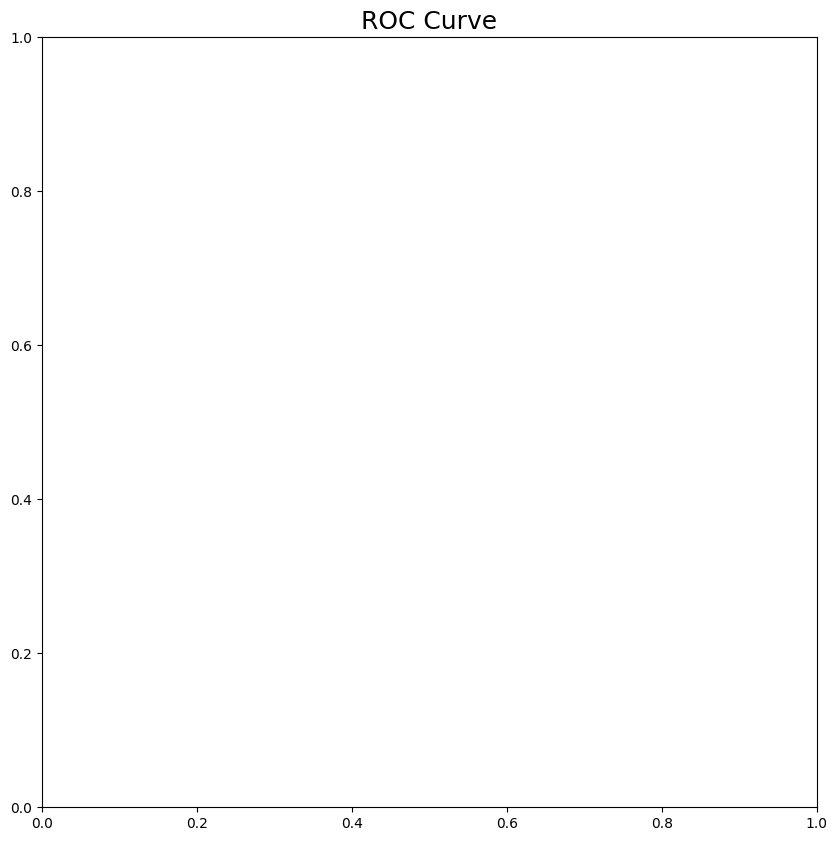

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("ROC Curve", fontsize=18)
plot_roc_curve(dt_tuned,scaled_test,y_test,ax=ax)

**Print Text Representation**

Exporting Decision Tree to the text representation can be useful when working on applications whitout user interface or when we want to log information about the model into the text file.

In [ ]:
text_representation = tree.export_text(tree_model)
print('\033[1m'+'\033[92m'+text_representation)

|--- feature_44 <= 0.24
|   |--- feature_7 <= 0.07
|   |   |--- feature_7 <= 0.04
|   |   |   |--- feature_34 <= 0.45
|   |   |   |   |--- feature_37 <= 0.82
|   |   |   |   |   |--- feature_30 <= 0.64
|   |   |   |   |   |   |--- feature_27 <= 0.27
|   |   |   |   |   |   |   |--- feature_19 <= 0.51
|   |   |   |   |   |   |   |   |--- feature_43 <= 0.20
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.55
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_7 >  0.03
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_4 >  0.55
|   |   |   |   |   |   |   |   |   |   |--- feature_11 <= 0.63
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_11 >  0.63
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0


**Tree Plot**

The sample counts that are shown are weighted with any sample_weights that might be present.

The visualization is fit automatically to the size of the axis. Use the figsize or dpi arguments of plt.figure to control the size of the rendering.

Tree to large to analyze. click or save the plot and see the nodes and leaf. It shows how decision made by model

In [ ]:
fig = plt.figure(figsize=(150,150))
_ = tree.plot_tree(dt_tuned, feature_names=feature_names,
                    class_names= ['yes','no'],
                   filled=True)

**Observations**

**Months of Marketing Activity:**

We saw that the the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers (Lowest effective rate: -34.49%). For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)

**Seasonality:**

Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.

**Campaign Calls:**

A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit.

**Age Category:**

The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of suscribing to a term deposit while the eldest category had a 76% chance of suscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions.

**Occupation:**

Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.

**House Loans and Balances:**

Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.

**Develop a Questionaire during the Calls:**

Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute.

**Target individuals with a higher duration (above 375):**

Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. The likelihood that this group would open a term deposit account is at 78% which is pretty high. This would allow that the success rate of the next marketing campaign would be highly successful.